In [ ]:
!pip install mrmr_selection xgboost lightgbm catboost chart_studio lime shap statsmodels xgboost

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
from pandas import read_excel
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,precision_score
from sklearn.metrics import confusion_matrix,roc_curve,recall_score,f1_score,roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
#dataset1 = pd.read_csv('/content/drive/MyDrive/Research_All/Bangladeshi student stress detection/Survey-Survey.csv',header= 0,encoding= 'unicode_escape') # Read CSV file and load into "dataset" variable
dataset2 = pd.read_csv('/content/drive/MyDrive/Research_All/Bangladeshi student stress detection/Raw Data.csv',header= 0,encoding= 'unicode_escape') # Read CSV file and load into "dataset" variable

In [ ]:
dataset2.info() ## Show detailed information for dataset columns(attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1977 non-null   object
 2   3. University                                                                                               

In [ ]:
dataset2.head(39) # Prints last 5 entries of the dataset

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
5,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,2,...,2,2,2,2,2,2,2,2,18,Moderately Severe Depression
6,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,Yes,0,1,1,...,0,1,0,0,0,1,1,0,3,Minimal Depression
7,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,2.50 - 2.99,No,2,2,2,...,3,3,0,0,3,3,0,0,14,Moderate Depression
8,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,2,...,2,2,2,2,2,2,2,2,18,Moderately Severe Depression
9,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,Yes,1,1,3,...,3,3,3,1,3,3,2,0,19,Moderately Severe Depression


In [ ]:
dataset2.describe()  # Print table which contain statistical data of the dataset

,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?","4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?","5. In a semester, how often have you worried too much about academic affairs?","6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?","7. In a semester, how often have you felt afraid, as if something awful might happen?",Anxiety Value,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",...,"1. In a semester, how often have you had little interest or pleasure in doing things?","2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,...,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,1.770359,1.629236,1.747092,1.777441,1.859383,1.787557,1.719777,12.290845,2.341932,2.319676,...,1.461305,1.787557,1.656550,1.958523,1.503794,1.781993,1.635812,1.426404,1.162367,14.374305
std,0.951704,1.028252,0.996336,0.966041,0.982362,0.993087,1.057735,5.496399,1.178599,1.154547,...,0.956358,1.034030,1.060373,0.975561,1.044608,1.073946,1.029864,1.026359,1.135746,6.659329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,13.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,14.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,17.000000,3.000000,3.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,19.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,21.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,27.000000


In [ ]:
#print(dataset1.shape)
print(dataset2.shape)

(1977, 39)


In [ ]:
#print(dataset1.columns)
print(dataset2.columns)

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

In [ ]:
# 1️⃣ Manual mapping for columns that need specific names
column_mapping = {
    "1. Age":"Age",
    "2. Gender":"Gender",
    "3. University":"University",
    "4. Department":"Department",
    "5. Academic Year":"Academic Year",
    "6. Current CGPA":"Current CGPA",
    '7. Did you receive a waiver or scholarship at your university?': 'Waiver/Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Nervous/Anxious',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worrying',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Trouble Relaxing',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Easily Annoyed',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Excessive Worry',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful',
    'Anxiety Value': 'Anxiety Value',
    'Anxiety Label': 'Anxiety Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Lack of Control',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Nervous/Stress',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Inadequate Coping',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things Going Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control Irritations',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top Performance',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered by Performance',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Overwhelmed',
    'Stress Value': 'Stress Value',
    'Stress Label': 'Stress Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Lack of Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep Issues',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Fatigue',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite Issues',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Self-Doubt',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration Issues',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement Issues',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Suicidal Thoughts',
    "Depression Value":"Depression Value",
    "Depression Label":"Depression Label"
}

# Apply the manual renaming
dataset2.rename(columns=column_mapping, inplace=True)

# 2️⃣ Remove any leftover numbering automatically (e.g., "15. Anxiety Value" -> "Anxiety Value")
dataset2.columns = dataset2.columns.str.replace(r'^\d+\.\s*', '', regex=True)

print(dataset2.columns)


Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing', 'Easily Annoyed', 'Excessive Worry', 'Restless',
       'Fearful', 'Anxiety Value', 'Anxiety Label', 'Upset', 'Lack of Control',
       'Nervous/Stress', 'Inadequate Coping', 'Confident', 'Things Going Well',
       'Control Irritations', 'Top Performance', 'Angered by Performance',
       'Overwhelmed', 'Stress Value', 'Stress Label', 'Lack of Interest',
       'Feeling Down', 'Sleep Issues', 'Fatigue', 'Appetite Issues',
       'Self-Doubt', 'Concentration Issues', 'Movement Issues',
       'Suicidal Thoughts', 'Depression Value', 'Depression Label'],
      dtype='object')


In [ ]:
#print(dataset1.columns)
print(dataset2.columns)

Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing', 'Easily Annoyed', 'Excessive Worry', 'Restless',
       'Fearful', 'Anxiety Value', 'Anxiety Label', 'Upset', 'Lack of Control',
       'Nervous/Stress', 'Inadequate Coping', 'Confident', 'Things Going Well',
       'Control Irritations', 'Top Performance', 'Angered by Performance',
       'Overwhelmed', 'Stress Value', 'Stress Label', 'Lack of Interest',
       'Feeling Down', 'Sleep Issues', 'Fatigue', 'Appetite Issues',
       'Self-Doubt', 'Concentration Issues', 'Movement Issues',
       'Suicidal Thoughts', 'Depression Value', 'Depression Label'],
      dtype='object')


In [ ]:
#print(dataset1.shape)
print(dataset2.shape)

(1977, 39)


In [ ]:

dataset2.dtypes

,0
Age,object
Gender,object
University,object
Department,object
Academic Year,object
Current CGPA,object
Waiver/Scholarship,object
Nervous/Anxious,int64
Worrying,int64
Trouble Relaxing,int64


In [ ]:
print(dataset2.dtypes)

Age                       object
Gender                    object
University                object
Department                object
Academic Year             object
Current CGPA              object
Waiver/Scholarship        object
Nervous/Anxious            int64
Worrying                   int64
Trouble Relaxing           int64
Easily Annoyed             int64
Excessive Worry            int64
Restless                   int64
Fearful                    int64
Anxiety Value              int64
Anxiety Label             object
Upset                      int64
Lack of Control            int64
Nervous/Stress             int64
Inadequate Coping          int64
Confident                  int64
Things Going Well          int64
Control Irritations        int64
Top Performance            int64
Angered by Performance     int64
Overwhelmed                int64
Stress Value               int64
Stress Label              object
Lack of Interest           int64
Feeling Down               int64
Sleep Issu

In [ ]:
# if your dataset contains missing value, remove those missing values

dataset2.dropna(inplace=True)
print(dataset2.shape)

(1977, 39)


In [ ]:
dataset2.drop_duplicates()

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


In [ ]:
dataset2.duplicated().sum() # Count the number of duplicate rows

np.int64(3)

In [ ]:
# Find duplicate rows
duplicates = dataset2[dataset2.duplicated()]
print(duplicates)

# Drop duplicate rows
dataset2 = dataset2.drop_duplicates()
print(dataset2.duplicated().sum())  # Should be 0


        Age Gender                                         University  \
1304  18-22   Male           Independent University, Bangladesh (IUB)   
1342  18-22   Male           Independent University, Bangladesh (IUB)   
1363  18-22   Male  American International University Bangladesh (...   

                                        Department             Academic Year  \
1304  Engineering - CS / CSE / CSC / Similar to CS  First Year or Equivalent   
1342  Engineering - CS / CSE / CSC / Similar to CS  First Year or Equivalent   
1363  Engineering - CS / CSE / CSC / Similar to CS  Third Year or Equivalent   

     Current CGPA Waiver/Scholarship  Nervous/Anxious  Worrying  \
1304  3.40 - 3.79                 No                1         1   
1342  3.40 - 3.79                Yes                1         1   
1363  3.00 - 3.39                 No                1         1   

      Trouble Relaxing  ...  Feeling Down  Sleep Issues  Fatigue  \
1304                 1  ...             1        

In [ ]:
dataset2.duplicated().sum() # Count the number of duplicate rows

np.int64(0)

In [ ]:
dataset2.shape

(1977, 39)

In [ ]:
for i in dataset1.columns:
    print(i,"\n")
    print(f"Unique Values =  \n {dataset1[i].unique()} \n ", "\n")
    print(f"Unique Value Count=  \n {dataset1[i].value_counts()} \n ", "-"*100 , "\n")

Major 

Unique Values =  
 ['Female' 'Male' 'Prefer not to say'] 
  

Unique Value Count=  
 Major
Male                 319
Female               246
Prefer not to say      6
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

class 

Unique Values =  
 ['> 25' '21-25' '< 20'] 
  

Unique Value Count=  
 class
21-25    460
> 25      75
< 20      36
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

gender 

Unique Values =  
 ['Yes' 'No'] 
  

Unique Value Count=  
 gender
Yes    417
No     154
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

age 

Unique Values =  
 ['Yes' 'No'] 
  

Unique Value Count=  
 age
No     324
Yes    247
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------

In [ ]:
for i in dataset2.columns:
    print(i,"\n")
    print(f"Unique Values =  \n {dataset2[i].unique()} \n ", "\n")
    print(f"Unique Value Count=  \n {dataset2[i].value_counts()} \n ", "-"*100 , "\n")

Age 

Unique Values =  
 ['18-22' '23-26' 'Below 18' '27-30' 'Above 30'] 
  

Unique Value Count=  
 Age
18-22       1270
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

Gender 

Unique Values =  
 ['Female' 'Male' 'Prefer not to say'] 
  

Unique Value Count=  
 Gender
Male                 1369
Female                595
Prefer not to say      10
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

University 

Unique Values =  
 ['Independent University, Bangladesh (IUB)' 'Daffodil University'
 'Bangladesh University of Engineering and Technology (BUET)'
 'BRAC University' 'Dhaka University (DU)' 'North South University (NSU)'
 'American International University Bangladesh (AIUB)'
 'Dhaka University of Engineering and Technology (DUET)'
 'Rajshahi University

Now not need to drop or remove any row value from dataset 2.

In [ ]:
conditions_to_drop = (
    (dataset2['Age'] == 'Below 18') |
    (dataset2['Age'] == 'Above 30') |
    #(dataset2['Gender'] == 'Prefer not to say') |
    (dataset2['Department'] == 'Engineering - Other') |
    (dataset2['Department'] == 'Pharmacy and Public Health') |
    (dataset2['Department'] == 'Law and Human Rights') |
    (dataset2['Department'] == 'Liberal Arts and Social Sciences')
)

print(f"Total number of records: {len(dataset2)}")
print(f"Number of records to be dropped: {len(dataset2[conditions_to_drop])}")
print(f"Percentage of data being deleted: { (len(dataset2[conditions_to_drop]) / len(dataset2)) * 100:.2f}%")

dataset2 = dataset2[~conditions_to_drop]

Total number of records: 1974
Number of records to be dropped: 14
Percentage of data being deleted: 0.71%


In [ ]:
dataset2.shape

(1960, 39)

In [ ]:
for i in dataset2.columns:
    print(i,"\n")
    print(f"Unique Values =  \n {dataset2[i].unique()} \n ", "\n")
    print(f"Unique Value Count=  \n {dataset2[i].value_counts()} \n ", "-"*100 , "\n")

Age 

Unique Values =  
 ['18-22' '23-26' '27-30'] 
  

Unique Value Count=  
 Age
18-22    1258
23-26     668
27-30      24
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

Gender 

Unique Values =  
 ['Female' 'Male'] 
  

Unique Value Count=  
 Gender
Male      1362
Female     588
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

University 

Unique Values =  
 ['Independent University, Bangladesh (IUB)' 'Daffodil University'
 'Bangladesh University of Engineering and Technology (BUET)'
 'BRAC University' 'Dhaka University (DU)' 'North South University (NSU)'
 'American International University Bangladesh (AIUB)'
 'Dhaka University of Engineering and Technology (DUET)'
 'Rajshahi University (RU)' 'Islamic University of Technology (IUT)'
 'United International University (UIU)'
 'Patuakhali Science and Technology Universi

Not need right nnow

In [ ]:
department_mapping = {
    'Engineering - CS / CSE / CSC / Similar to CS': 'CS/IT Engineering',
    'Other': 'Other',
    'Engineering - EEE/ ECE / Similar to EEE': 'EEE/ECE Engineering',
    'Environmental and Life Sciences': 'Env/Life Sciences',
    'Business and Entrepreneurship Studies': 'Business/Entrepreneurship',
    'Biological Sciences': 'Biological Sciences',
    'Engineering - Civil Engineering / Similar to CE': 'Civil Engineering',
    'Engineering - Mechanical Engineering / Similar to ME': 'Mechanical Engineering'
}

Academic_year_mapping ={
    'Fourth Year or Equivalent': 4,
    'First Year or Equivalent': 1,
    'Third Year or Equivalent': 3,
    'Second Year or Equivalent': 2,
    'Other': -1            #placeholder for others
}

age_mapping = {
    '18-22': 20,
    '23-26': 25,
    '27-30': 28
}

cgpa_mapping = {
    'Below 2.50': 2.0,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
    'Other': -1             #placeholder for others
}

dataset2['Department'] = dataset2['Department'].map(department_mapping)
dataset2['Academic Year'] = dataset2['Academic Year'].map(Academic_year_mapping)
dataset2['Age'] = dataset2['Age'].map(age_mapping)
dataset2['Current CGPA'] = dataset2['Current CGPA'].map(cgpa_mapping)

In [ ]:
dataset2.dtypes

,0
Age,float64
Gender,int64
University,int64
Department,int64
Academic Year,int64
Current CGPA,float64
Waiver/Scholarship,int64
Nervous/Anxious,int64
Worrying,int64
Trouble Relaxing,int64


Check Statistics Of Dataset

In [ ]:
dataset2.describe().T    #show only for int type

,count,mean,std,min,25%,50%,75%,max
Age,1967.0,21.808338,2.463234,20.0,20.00,20.0,25.0,28.0
Gender,1974.0,0.703647,0.467729,0.0,0.00,1.0,1.0,2.0
University,1974.0,5.595745,3.752843,0.0,0.00,8.0,8.0,14.0
Department,1974.0,2.417933,1.495085,0.0,2.00,2.0,2.0,8.0
Academic Year,1974.0,2.305471,1.193155,0.0,1.00,2.0,3.0,4.0
Current CGPA,1974.0,2.904711,1.270853,-1.0,2.75,3.2,3.6,3.9
Waiver/Scholarship,1974.0,0.205167,0.403926,0.0,0.00,0.0,0.0,1.0
Nervous/Anxious,1974.0,1.771530,0.951953,0.0,1.00,2.0,3.0,3.0
Worrying,1974.0,1.630193,1.028741,0.0,1.00,2.0,3.0,3.0
Trouble Relaxing,1974.0,1.748227,0.996667,0.0,1.00,2.0,3.0,3.0


In [ ]:
dataset2.describe(include='object').T


ValueError: No objects to concatenate

Check Numerical and Categorical Columns

In [ ]:
numerica_columns = dataset2.select_dtypes(exclude="object").columns
categorical_columns = dataset2.select_dtypes(include="object").columns

print(f"We have {len(numerica_columns)} Numeric Columns: \n {numerica_columns} \n", "-" * 80)
print(f"We have {len(categorical_columns)} Categorical Columns: \n {categorical_columns} \n")

We have 32 Numeric Columns: 
 Index(['Age', 'Academic Year', 'Current CGPA', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing', 'Easily Annoyed', 'Excessive Worry', 'Restless',
       'Fearful', 'Anxiety Value', 'Upset', 'Lack of Control',
       'Nervous/Stress', 'Inadequate Coping', 'Confident', 'Things Going Well',
       'Control Irritations', 'Top Performance', 'Angered by Performance',
       'Overwhelmed', 'Stress Value', 'Lack of Interest', 'Feeling Down',
       'Sleep Issues', 'Fatigue', 'Appetite Issues', 'Self-Doubt',
       'Concentration Issues', 'Movement Issues', 'Suicidal Thoughts',
       'Depression Value'],
      dtype='object') 
 --------------------------------------------------------------------------------
We have 7 Categorical Columns: 
 Index(['Gender', 'University', 'Department', 'Waiver/Scholarship',
       'Anxiety Label', 'Stress Label', 'Depression Label'],
      dtype='object') 



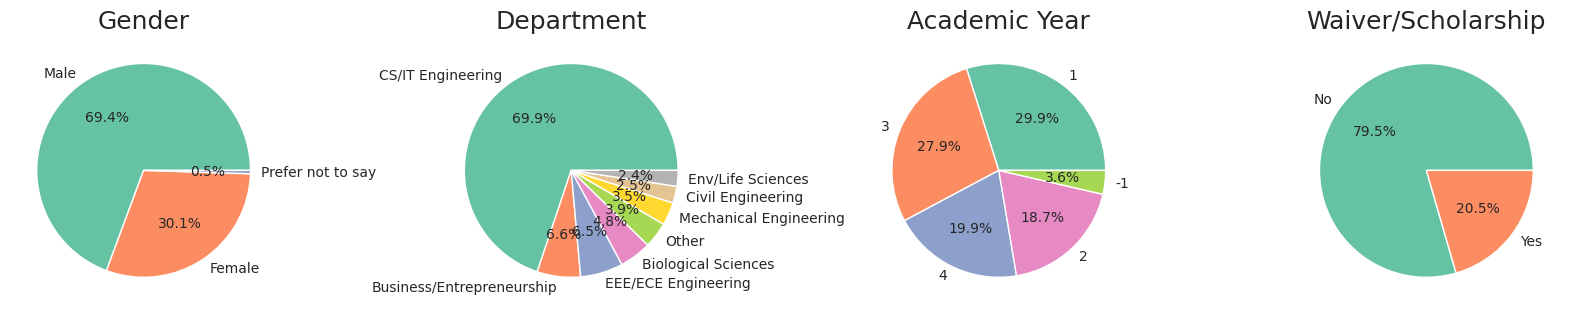

In [ ]:
palette = sns.color_palette("Set2")
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.pie(dataset2["Gender"].value_counts(), labels=dataset2["Gender"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Gender",fontsize= 18)

plt.subplot(1,4,2)
plt.pie(dataset2["Department"].value_counts(), labels=dataset2["Department"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Department",fontsize= 18)

plt.subplot(1,4,3)
plt.pie(dataset2["Academic Year"].value_counts(), labels=dataset2["Academic Year"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Academic Year",fontsize= 18)

plt.subplot(1,4,4)
plt.pie(dataset2["Waiver/Scholarship"].value_counts(), labels=dataset2["Waiver/Scholarship"].value_counts().index , autopct='%1.1f%%', colors=palette)
plt.title("Waiver/Scholarship",fontsize= 18)

plt.subplots_adjust(wspace=0.6,hspace=0.5)
plt.show()

# ** ENCODING TECHNIQUES**

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le   # store encoder for later use

le2 = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == np.number:
        continue
    else:
        dataset2[col] = le2.fit_transform(dataset2[col])

In [ ]:

le2 = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == np.number:
        continue
    else:
        dataset2[col] = le2.fit_transform(dataset2[col])

In [ ]:
dataset2.head(39)

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,20.0,0,8,2,4,2.75,0,1,1,1,...,2,1,1,2,1,1,1,1,11,2
1,20.0,1,8,2,1,3.90,0,2,2,1,...,1,1,1,1,1,1,1,1,9,0
2,20.0,1,8,2,1,3.20,0,2,1,1,...,0,2,3,2,2,2,2,1,16,3
3,20.0,1,8,2,1,3.60,0,2,1,1,...,1,1,1,1,1,1,1,1,9,0
4,20.0,1,8,2,1,3.60,0,1,1,1,...,1,1,1,1,1,1,1,1,9,0
5,20.0,1,8,2,1,3.90,0,2,2,2,...,2,2,2,2,2,2,2,2,18,3
6,20.0,1,8,2,1,3.90,1,0,1,1,...,0,1,0,0,0,1,1,0,3,1
7,20.0,1,8,2,3,2.75,0,2,2,2,...,3,3,0,0,3,3,0,0,14,2
8,20.0,0,8,2,1,3.90,0,2,2,2,...,2,2,2,2,2,2,2,2,18,3
9,20.0,0,8,2,1,3.90,1,1,1,3,...,3,3,3,1,3,3,2,0,19,3


In [ ]:
dataset2.columns

Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing', 'Easily Annoyed', 'Excessive Worry', 'Restless',
       'Fearful', 'Anxiety Value', 'Anxiety Label', 'Upset', 'Lack of Control',
       'Nervous/Stress', 'Inadequate Coping', 'Confident', 'Things Going Well',
       'Control Irritations', 'Top Performance', 'Angered by Performance',
       'Overwhelmed', 'Stress Value', 'Stress Label', 'Lack of Interest',
       'Feeling Down', 'Sleep Issues', 'Fatigue', 'Appetite Issues',
       'Self-Doubt', 'Concentration Issues', 'Movement Issues',
       'Suicidal Thoughts', 'Depression Value', 'Depression Label'],
      dtype='object')

# Data Preprocessing

Encode Categorical Columns

In [ ]:
le2 = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == np.number:
        continue
    else:
        dataset2[col] = le2.fit_transform(dataset2[col])

Feature Selection

In [ ]:
x = dataset2.drop(columns=["Anxiety Label","Anxiety Value", "Stress Label", "Stress Value",  "Depression Value", "Depression Label"])
y=dataset2[["Anxiety Label", "Stress Label", "Depression Label"]]

y_anxiety = dataset2["Anxiety Label"]
y_Stress = dataset2["Stress Label"]
y_Depression = dataset2["Depression Label"]

Scaling Features

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Splitting Data For Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Split features once
X_train, X_test = train_test_split(x, test_size=0.2, random_state=42)

# Now split labels using the same indices
_, _, y_train_Depression, y_test_Depression = train_test_split(
    x, y_Depression, test_size=0.2, random_state=42
)
_, _, y_train_Anxiety, y_test_Anxiety = train_test_split(
    x, y_anxiety, test_size=0.2, random_state=42
)
_, _, y_train_Stress, y_test_Stress = train_test_split(
    x, y_Stress, test_size=0.2, random_state=42
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Depression: {y_train_Depression.shape}, {y_test_Depression.shape}")
print(f"Anxiety: {y_train_Anxiety.shape}, {y_test_Anxiety.shape}")
print(f"Stress: {y_train_Stress.shape}, {y_test_Stress.shape}")

X_train: (1579, 33), X_test: (395, 33)
Depression: (1579,), (395,)
Anxiety: (1579,), (395,)
Stress: (1579,), (395,)


In [ ]:
print("Anxiety Train Class Distribution:")
print(y_train_Anxiety.value_counts())

print("\nStress Train Class Distribution:")
print(y_train_Stress.value_counts())

print("\nDepression Train Class Distribution:")
print(y_train_Depression.value_counts())

Anxiety Train Class Distribution:
Anxiety Label
3    571
2    489
0    397
1    122
Name: count, dtype: int64

Stress Train Class Distribution:
Stress Label
2    1042
0     443
1      94
Name: count, dtype: int64

Depression Train Class Distribution:
Depression Label
5    398
3    382
2    357
0    330
1     79
4     33
Name: count, dtype: int64


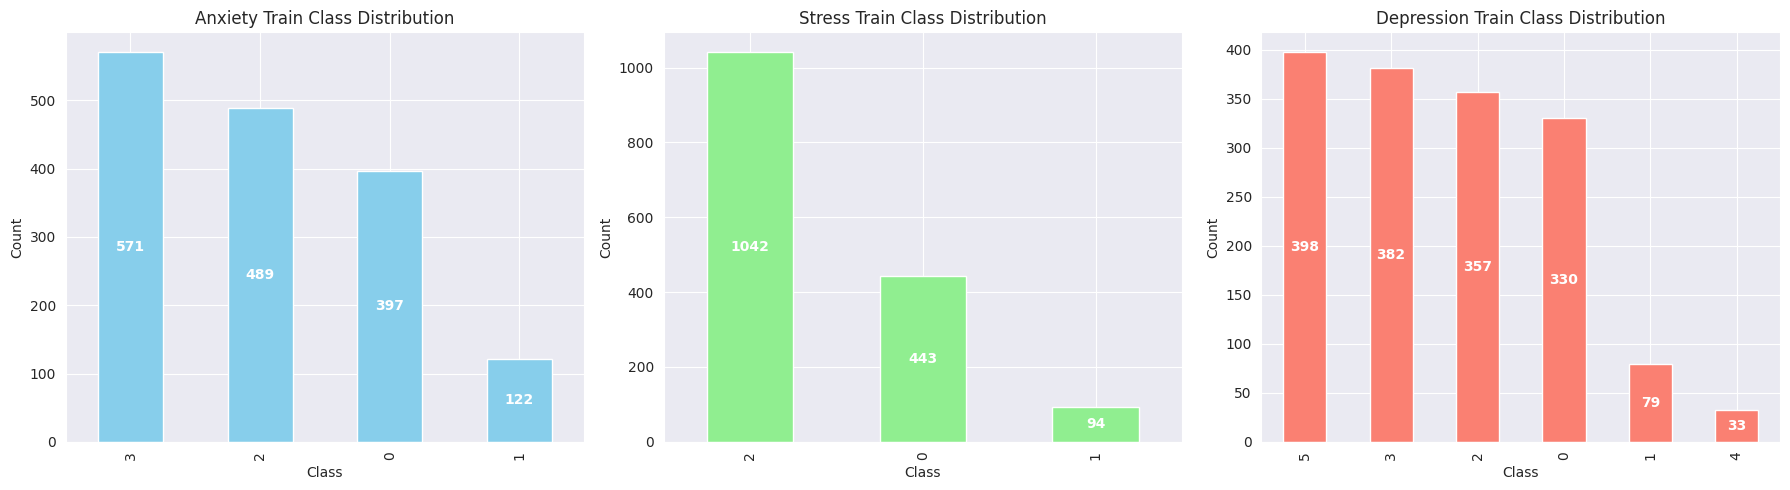

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Anxiety distribution
counts_anx = y_train_Anxiety.value_counts()
counts_anx.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title("Anxiety Train Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
for i, v in enumerate(counts_anx):
    axes[0].text(i, v/2, str(v), color='white', ha='center', va='center', fontweight='bold')

# Stress distribution
counts_str = y_train_Stress.value_counts()
counts_str.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title("Stress Train Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
for i, v in enumerate(counts_str):
    axes[1].text(i, v/2, str(v), color='white', ha='center', va='center', fontweight='bold')

# Depression distribution
counts_dep = y_train_Depression.value_counts()
counts_dep.plot(kind='bar', color='salmon', ax=axes[2])
axes[2].set_title("Depression Train Class Distribution")
axes[2].set_xlabel("Class")
axes[2].set_ylabel("Count")
for i, v in enumerate(counts_dep):
    axes[2].text(i, v/2, str(v), color='white', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_Anxiety, y_train_Anxiety = ros.fit_resample(X_train, y_train_Anxiety)
X_train_Stress, y_train_Stress = ros.fit_resample(X_train, y_train_Stress)
X_train_Depression, y_train_Depression = ros.fit_resample(X_train, y_train_Depression)

print("Anxiety Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Anxiety).value_counts())

print("\nStress Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Stress).value_counts())

print("\nDepression Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Depression).value_counts())

Anxiety Train Class Distribution After Oversampling:
Anxiety Label
3    571
2    571
0    571
1    571
Name: count, dtype: int64

Stress Train Class Distribution After Oversampling:
Stress Label
2    1042
0    1042
1    1042
Name: count, dtype: int64

Depression Train Class Distribution After Oversampling:
Depression Label
3    398
2    398
0    398
4    398
5    398
1    398
Name: count, dtype: int64


Oversampling(SMOT)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np


smote = SMOTE(random_state=42)

# === Depression ===
X_train_res_Dep, y_train_res_Dep = smote.fit_resample(X_train_imputed, y_train_Depression.ravel())
print("Depression Before SMOTE:", Counter(y_train_Depression))
print("Depression After SMOTE :", Counter(y_train_res_Dep))

# === Anxiety ===
X_train_res_Anx, y_train_res_Anx = smote.fit_resample(X_train_imputed, y_train_Anxiety.ravel())
print("Anxiety Before SMOTE:", Counter(y_train_Anxiety))
print("Anxiety After SMOTE :", Counter(y_train_res_Anx))

# === Stress ===
X_train_res_Str, y_train_res_Str = smote.fit_resample(X_train_imputed, y_train_Stress.ravel())
print("Stress Before SMOTE:", Counter(y_train_Stress))
print("Stress After SMOTE :", Counter(y_train_res_Str))

print(f"\nResampled Shapes:")
print(f"Depression -> X: {X_train_res_Dep.shape}, y: {y_train_res_Dep.shape}")
print(f"Anxiety    -> X: {X_train_res_Anx.shape}, y: {y_train_res_Anx.shape}")
print(f"Stress     -> X: {X_train_res_Str.shape}, y: {y_train_res_Str.shape}")

Depression Before SMOTE: Counter({3: 398, 2: 398, 0: 398, 4: 398, 5: 398, 1: 398})
Depression After SMOTE : Counter({np.int64(3): 398, np.int64(2): 398, np.int64(0): 398, np.int64(4): 398, np.int64(5): 398, np.int64(1): 398})


ValueError: Found input variables with inconsistent numbers of samples: [2388, 2284]

In [ ]:
dataset2.head(30)

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,20.0,0,8,2,4,2.75,0,1,1,1,...,2,1,1,2,1,1,1,1,11,2
1,20.0,1,8,2,1,3.90,0,2,2,1,...,1,1,1,1,1,1,1,1,9,0
2,20.0,1,8,2,1,3.20,0,2,1,1,...,0,2,3,2,2,2,2,1,16,3
3,20.0,1,8,2,1,3.60,0,2,1,1,...,1,1,1,1,1,1,1,1,9,0
4,20.0,1,8,2,1,3.60,0,1,1,1,...,1,1,1,1,1,1,1,1,9,0
5,20.0,1,8,2,1,3.90,0,2,2,2,...,2,2,2,2,2,2,2,2,18,3
6,20.0,1,8,2,1,3.90,1,0,1,1,...,0,1,0,0,0,1,1,0,3,1
7,20.0,1,8,2,3,2.75,0,2,2,2,...,3,3,0,0,3,3,0,0,14,2
8,20.0,0,8,2,1,3.90,0,2,2,2,...,2,2,2,2,2,2,2,2,18,3
9,20.0,0,8,2,1,3.90,1,1,1,3,...,3,3,3,1,3,3,2,0,19,3


In [ ]:
from sklearn.model_selection import train_test_split

# Split once and keep indices consistent
X_train, X_test, y_train_Depression, y_test_Depression, \
y_train_Anxiety, y_test_Anxiety, \
y_train_Stress, y_test_Stress = train_test_split(
    x, y_Depression, y_anxiety, y_Stress, test_size=0.2, random_state=42
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Depression: {y_train_Depression.shape}, {y_test_Depression.shape}")
print(f"Anxiety: {y_train_Anxiety.shape}, {y_test_Anxiety.shape}")
print(f"Stress: {y_train_Stress.shape}, {y_test_Stress.shape}")


X_train: (1579, 33), X_test: (395, 33)
Depression: (1579,), (395,)
Anxiety: (1579,), (395,)
Stress: (1579,), (395,)


In [ ]:
X_test.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

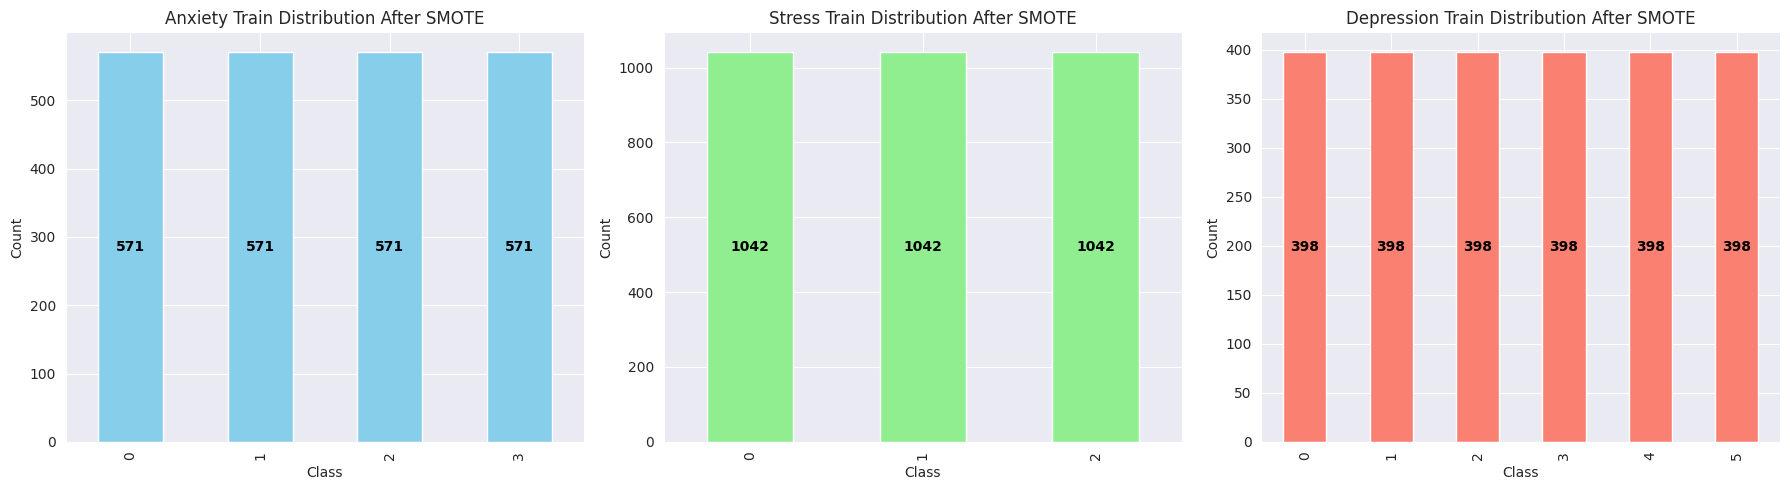

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# After SMOTE oversampling counts
ros_counts = {
    'Anxiety': pd.Series(y_train_res_Anx).value_counts().sort_index(),
    'Stress': pd.Series(y_train_res_Str).value_counts().sort_index(),
    'Depression': pd.Series(y_train_res_Dep).value_counts().sort_index()
}

# Create 1 row, 3 columns of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Anxiety
ros_counts['Anxiety'].plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title("Anxiety Train Distribution After SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
for i, v in enumerate(ros_counts['Anxiety']):
    axes[0].text(i, v/2, str(v), color='black', ha='center', va='center', fontweight='bold')

# Stress
ros_counts['Stress'].plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title("Stress Train Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
for i, v in enumerate(ros_counts['Stress']):
    axes[1].text(i, v/2, str(v), color='black', ha='center', va='center', fontweight='bold')

# Depression
ros_counts['Depression'].plot(kind='bar', color='salmon', ax=axes[2])
axes[2].set_title("Depression Train Distribution After SMOTE")
axes[2].set_xlabel("Class")
axes[2].set_ylabel("Count")
for i, v in enumerate(ros_counts['Depression']):
    axes[2].text(i, v/2, str(v), color='black', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Model Training


===== Depression Classification =====

Depression - K-Neighbors Classifier Accuracy: 65.5612%
              precision    recall  f1-score   support

           0       0.54      0.75      0.63        79
           1       0.42      0.85      0.56        13
           2       0.67      0.38      0.49        91
           3       0.63      0.68      0.66        92
           4       0.60      0.67      0.63         9
           5       0.87      0.77      0.82       108

    accuracy                           0.66       392
   macro avg       0.62      0.68      0.63       392
weighted avg       0.68      0.66      0.65       392



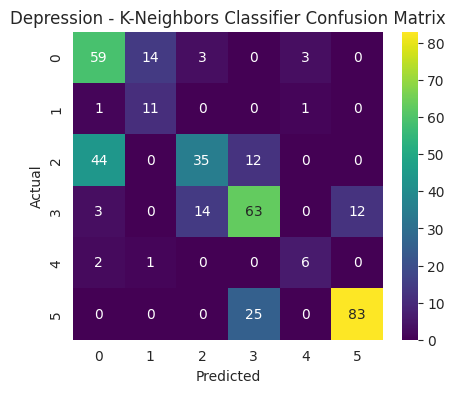

---------------------------------------------------------------------- 

Depression - Support Vector Classifier Accuracy: 91.5816%
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        79
           1       0.75      0.92      0.83        13
           2       0.93      0.88      0.90        91
           3       0.89      0.95      0.92        92
           4       1.00      0.89      0.94         9
           5       0.98      0.92      0.95       108

    accuracy                           0.92       392
   macro avg       0.90      0.91      0.91       392
weighted avg       0.92      0.92      0.92       392



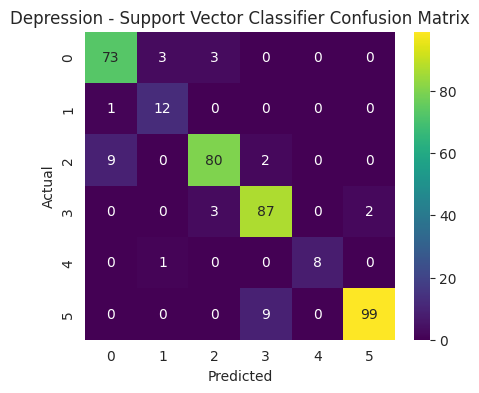

---------------------------------------------------------------------- 

Depression - Decision Tree Classifier Accuracy: 73.7245%
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        79
           1       0.64      0.69      0.67        13
           2       0.64      0.63      0.63        91
           3       0.69      0.66      0.68        92
           4       1.00      1.00      1.00         9
           5       0.85      0.87      0.86       108

    accuracy                           0.74       392
   macro avg       0.76      0.77      0.76       392
weighted avg       0.74      0.74      0.74       392



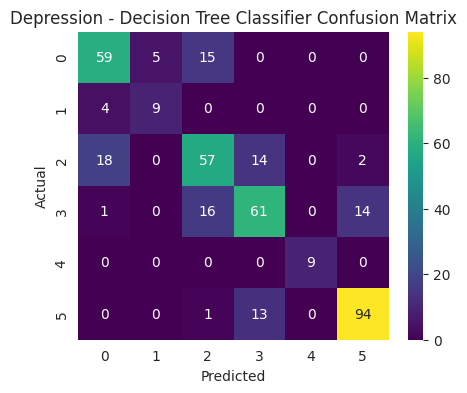

---------------------------------------------------------------------- 

Depression - Random Forest Classifier Accuracy: 85.9694%
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        79
           1       0.92      0.92      0.92        13
           2       0.79      0.84      0.81        91
           3       0.84      0.84      0.84        92
           4       1.00      1.00      1.00         9
           5       0.92      0.92      0.92       108

    accuracy                           0.86       392
   macro avg       0.89      0.89      0.89       392
weighted avg       0.86      0.86      0.86       392



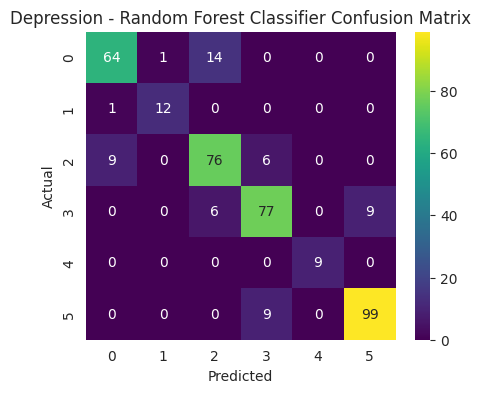

---------------------------------------------------------------------- 

Depression - Gradient Boosting Classifier Accuracy: 86.2245%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        79
           1       0.85      0.85      0.85        13
           2       0.87      0.78      0.82        91
           3       0.81      0.88      0.84        92
           4       1.00      1.00      1.00         9
           5       0.92      0.90      0.91       108

    accuracy                           0.86       392
   macro avg       0.88      0.88      0.88       392
weighted avg       0.86      0.86      0.86       392



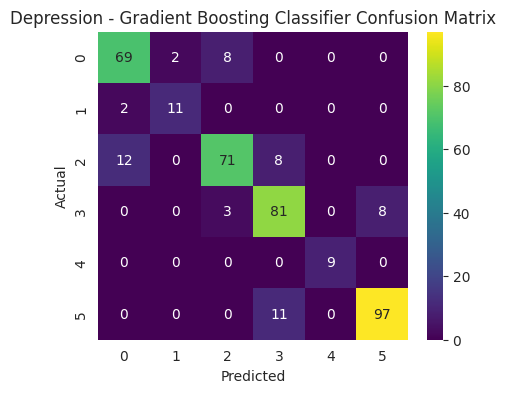

---------------------------------------------------------------------- 

Depression - XGBoost Classifier Accuracy: 85.4592%
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        79
           1       0.92      0.92      0.92        13
           2       0.76      0.79      0.77        91
           3       0.81      0.82      0.81        92
           4       1.00      1.00      1.00         9
           5       0.94      0.94      0.94       108

    accuracy                           0.85       392
   macro avg       0.89      0.88      0.88       392
weighted avg       0.86      0.85      0.86       392



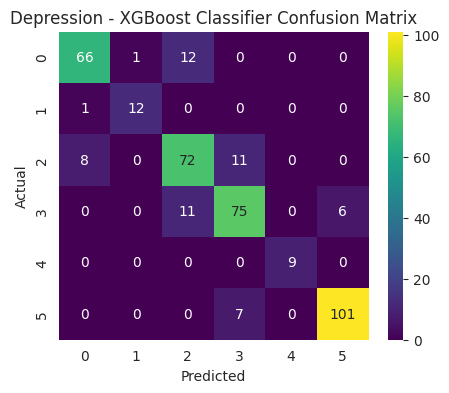

---------------------------------------------------------------------- 

Depression - AdaBoost Classifier Accuracy: 56.1224%
              precision    recall  f1-score   support

           0       0.80      0.65      0.71        79
           1       0.31      0.38      0.34        13
           2       0.48      0.82      0.61        91
           3       0.38      0.45      0.41        92
           4       0.00      0.00      0.00         9
           5       0.96      0.44      0.61       108

    accuracy                           0.56       392
   macro avg       0.49      0.46      0.45       392
weighted avg       0.64      0.56      0.56       392



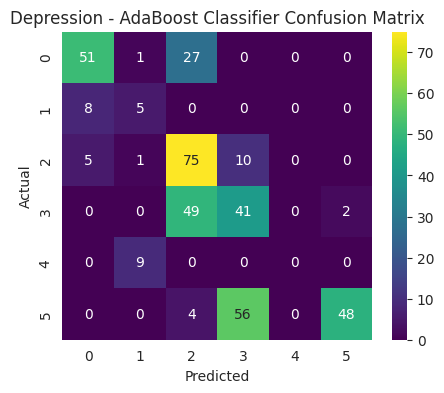

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5671
[LightGBM] [Info] Number of data points in the train set: 2406, number of used features: 33
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

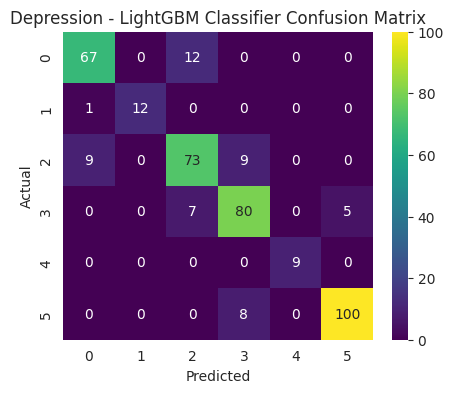

---------------------------------------------------------------------- 




===== Depression Classification =====

Depression - K-Neighbors Classifier
  Training Accuracy: 86.31%
  Testing Accuracy : 67.34%
              precision    recall  f1-score   support

           0       0.56      0.80      0.66        75
           1       0.30      0.50      0.38        14
           2       0.74      0.50      0.60        92
           3       0.75      0.71      0.73       113
           4       0.44      0.36      0.40        11
           5       0.79      0.77      0.78        90

    accuracy                           0.67       395
   macro avg       0.60      0.61      0.59       395
weighted avg       0.70      0.67      0.67       395



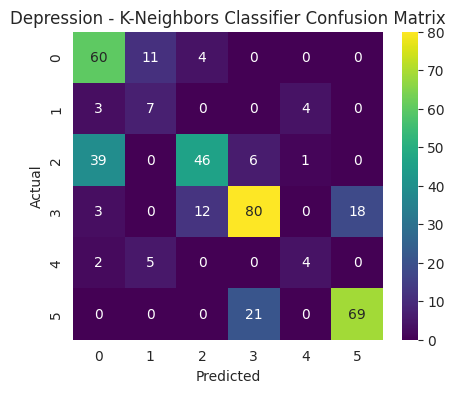

---------------------------------------------------------------------- 

Depression - Support Vector Classifier
  Training Accuracy: 99.16%
  Testing Accuracy : 87.85%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        75
           1       0.55      0.79      0.65        14
           2       0.88      0.88      0.88        92
           3       0.92      0.89      0.91       113
           4       0.78      0.64      0.70        11
           5       0.93      0.91      0.92        90

    accuracy                           0.88       395
   macro avg       0.82      0.83      0.82       395
weighted avg       0.88      0.88      0.88       395



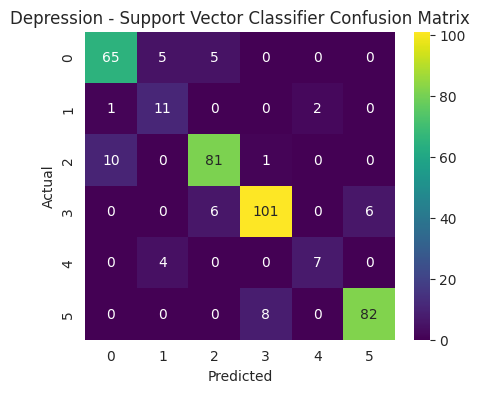

---------------------------------------------------------------------- 

Depression - Decision Tree Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 72.66%
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        75
           1       0.65      0.79      0.71        14
           2       0.65      0.70      0.67        92
           3       0.71      0.58      0.64       113
           4       1.00      1.00      1.00        11
           5       0.77      0.86      0.81        90

    accuracy                           0.73       395
   macro avg       0.76      0.78      0.77       395
weighted avg       0.73      0.73      0.72       395



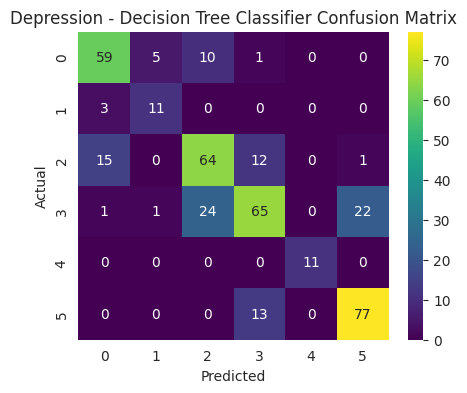

---------------------------------------------------------------------- 

Depression - Random Forest Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 84.30%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        75
           1       0.58      0.79      0.67        14
           2       0.85      0.82      0.83        92
           3       0.84      0.81      0.83       113
           4       1.00      0.73      0.84        11
           5       0.86      0.90      0.88        90

    accuracy                           0.84       395
   macro avg       0.83      0.82      0.82       395
weighted avg       0.85      0.84      0.84       395



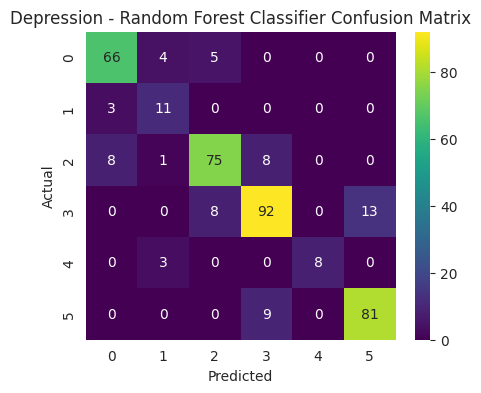

---------------------------------------------------------------------- 

Depression - Gradient Boosting Classifier
  Training Accuracy: 99.66%
  Testing Accuracy : 88.10%
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.92      0.79      0.85        14
           2       0.86      0.86      0.86        92
           3       0.90      0.83      0.86       113
           4       1.00      1.00      1.00        11
           5       0.89      0.92      0.91        90

    accuracy                           0.88       395
   macro avg       0.90      0.89      0.89       395
weighted avg       0.88      0.88      0.88       395



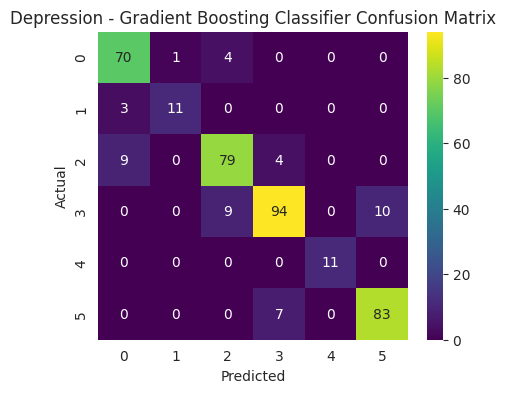

---------------------------------------------------------------------- 

Depression - XGBoost Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 85.82%
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        75
           1       0.82      0.64      0.72        14
           2       0.83      0.82      0.82        92
           3       0.87      0.84      0.86       113
           4       1.00      0.91      0.95        11
           5       0.89      0.92      0.91        90

    accuracy                           0.86       395
   macro avg       0.87      0.84      0.85       395
weighted avg       0.86      0.86      0.86       395



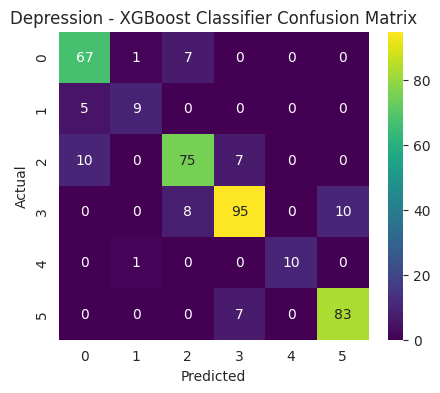

---------------------------------------------------------------------- 

Depression - AdaBoost Classifier
  Training Accuracy: 35.89%
  Testing Accuracy : 45.82%
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        75
           1       0.00      0.00      0.00        14
           2       0.46      0.84      0.59        92
           3       0.37      0.43      0.40       113
           4       0.00      0.00      0.00        11
           5       1.00      0.06      0.11        90

    accuracy                           0.46       395
   macro avg       0.40      0.33      0.29       395
weighted avg       0.55      0.46      0.39       395



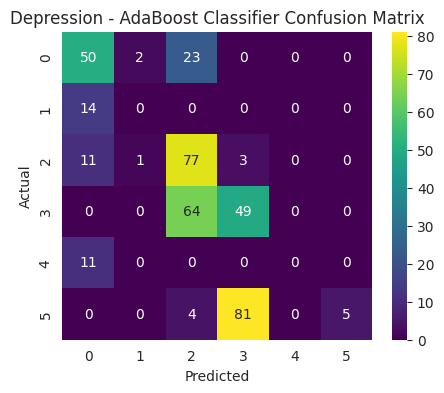

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5320
[LightGBM] [Info] Number of data points in the train set: 2388, number of used features: 33
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

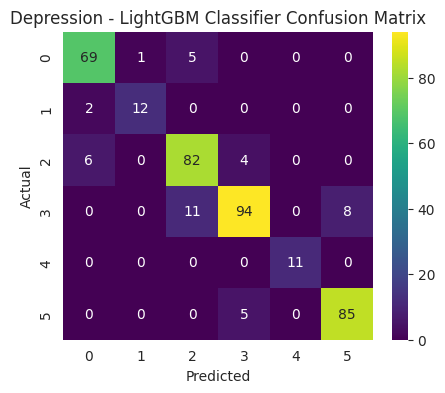

---------------------------------------------------------------------- 

Depression - CatBoost Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 93.92%
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        75
           1       0.92      0.79      0.85        14
           2       0.94      0.92      0.93        92
           3       0.96      0.95      0.95       113
           4       1.00      1.00      1.00        11
           5       0.96      0.96      0.96        90

    accuracy                           0.94       395
   macro avg       0.94      0.93      0.93       395
weighted avg       0.94      0.94      0.94       395



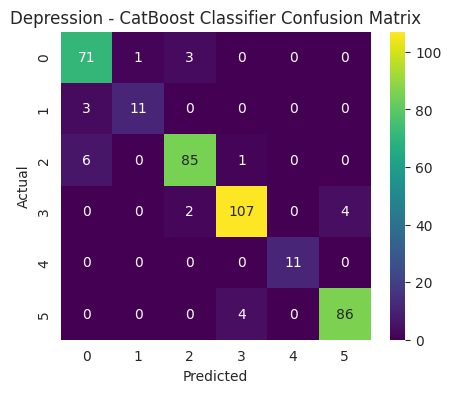

---------------------------------------------------------------------- 

Depression - Gaussian Naive Bayes
  Training Accuracy: 80.32%
  Testing Accuracy : 69.87%
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        75
           1       0.53      0.64      0.58        14
           2       0.61      0.64      0.63        92
           3       0.68      0.63      0.65       113
           4       1.00      1.00      1.00        11
           5       0.78      0.80      0.79        90

    accuracy                           0.70       395
   macro avg       0.72      0.74      0.73       395
weighted avg       0.70      0.70      0.70       395



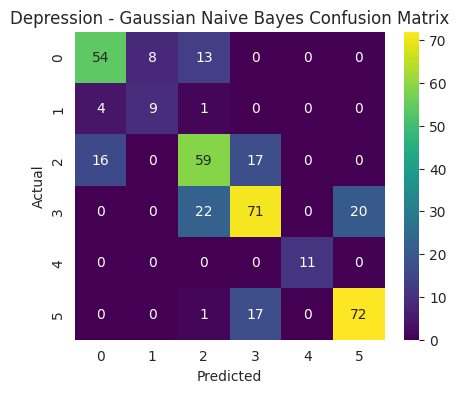

---------------------------------------------------------------------- 

Depression - Bernoulli Naive Bayes
  Training Accuracy: 60.68%
  Testing Accuracy : 59.24%
              precision    recall  f1-score   support

           0       0.63      0.39      0.48        75
           1       0.12      0.29      0.17        14
           2       0.59      0.65      0.62        92
           3       0.69      0.54      0.60       113
           4       0.28      0.64      0.39        11
           5       0.72      0.81      0.76        90

    accuracy                           0.59       395
   macro avg       0.51      0.55      0.50       395
weighted avg       0.63      0.59      0.60       395



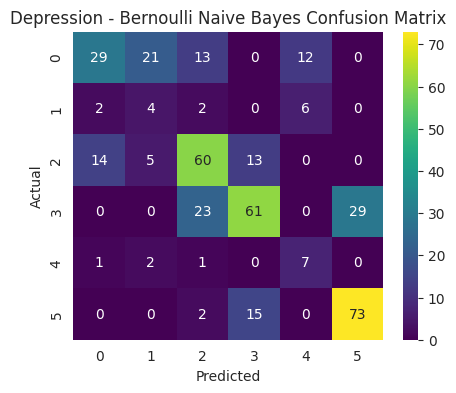

---------------------------------------------------------------------- 


===== Anxiety Classification =====

Anxiety - K-Neighbors Classifier
  Training Accuracy: 90.11%
  Testing Accuracy : 80.25%
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        95
           1       0.87      0.75      0.81        36
           2       0.72      0.77      0.74       121
           3       0.96      0.80      0.87       143

    accuracy                           0.80       395
   macro avg       0.82      0.80      0.80       395
weighted avg       0.82      0.80      0.81       395



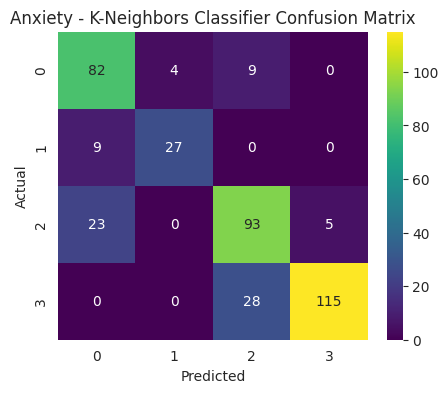

---------------------------------------------------------------------- 

Anxiety - Support Vector Classifier
  Training Accuracy: 99.69%
  Testing Accuracy : 92.91%
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.97      0.81      0.88        36
           2       0.91      0.93      0.92       121
           3       0.96      0.94      0.95       143

    accuracy                           0.93       395
   macro avg       0.93      0.91      0.92       395
weighted avg       0.93      0.93      0.93       395



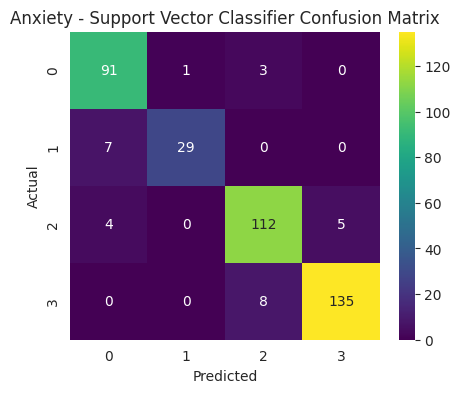

---------------------------------------------------------------------- 

Anxiety - Decision Tree Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 83.04%
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        95
           1       0.90      0.75      0.82        36
           2       0.79      0.76      0.77       121
           3       0.90      0.92      0.91       143

    accuracy                           0.83       395
   macro avg       0.84      0.81      0.82       395
weighted avg       0.83      0.83      0.83       395



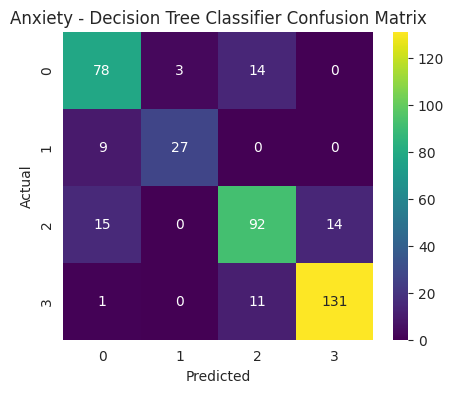

---------------------------------------------------------------------- 

Anxiety - Random Forest Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 92.41%
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        95
           1       0.97      0.81      0.88        36
           2       0.90      0.93      0.91       121
           3       0.96      0.95      0.95       143

    accuracy                           0.92       395
   macro avg       0.93      0.90      0.91       395
weighted avg       0.93      0.92      0.92       395



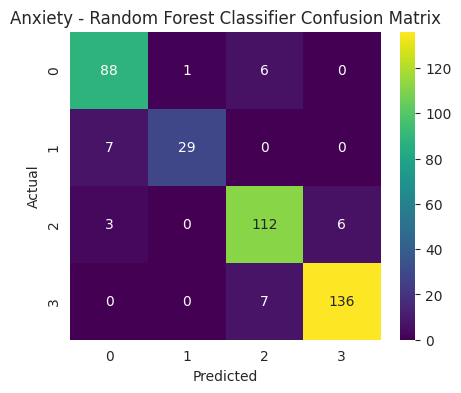

---------------------------------------------------------------------- 

Anxiety - Gradient Boosting Classifier
  Training Accuracy: 99.91%
  Testing Accuracy : 94.68%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        95
           1       0.97      0.89      0.93        36
           2       0.95      0.92      0.93       121
           3       0.95      0.97      0.96       143

    accuracy                           0.95       395
   macro avg       0.95      0.94      0.94       395
weighted avg       0.95      0.95      0.95       395



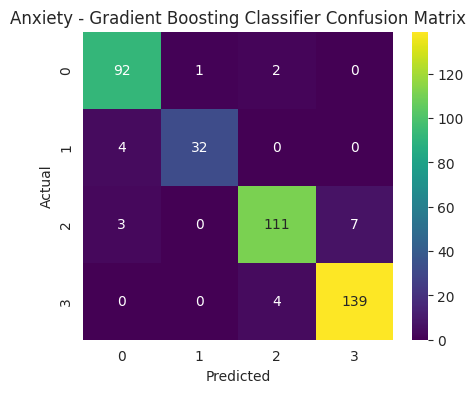

---------------------------------------------------------------------- 

Anxiety - XGBoost Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 93.42%
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.97      0.86      0.91        36
           2       0.93      0.90      0.92       121
           3       0.95      0.97      0.96       143

    accuracy                           0.93       395
   macro avg       0.94      0.92      0.93       395
weighted avg       0.93      0.93      0.93       395



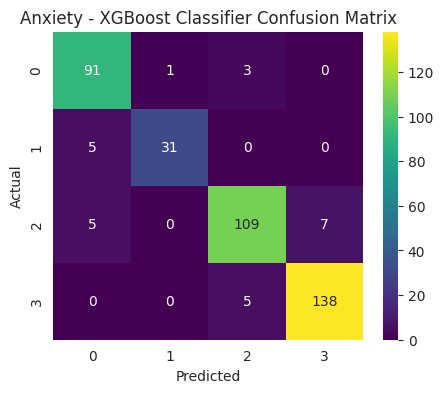

---------------------------------------------------------------------- 

Anxiety - AdaBoost Classifier
  Training Accuracy: 67.95%
  Testing Accuracy : 67.34%
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        95
           1       0.90      0.25      0.39        36
           2       0.54      0.98      0.70       121
           3       1.00      0.34      0.50       143

    accuracy                           0.67       395
   macro avg       0.80      0.63      0.61       395
weighted avg       0.79      0.67      0.64       395



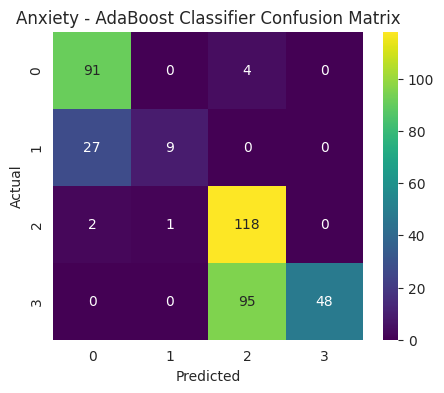

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5646
[LightGBM] [Info] Number of data points in the train set: 2284, number of used features: 33
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Anxiety - LightGBM Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 93.42%
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1 

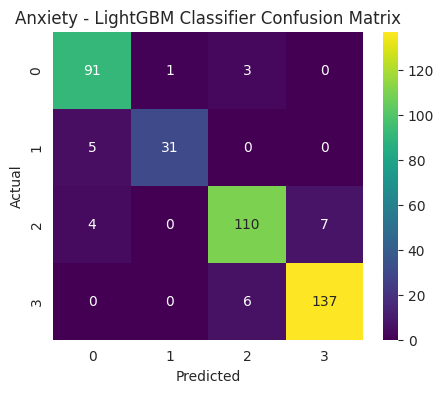

---------------------------------------------------------------------- 

Anxiety - CatBoost Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 95.95%
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        95
           1       1.00      0.89      0.94        36
           2       0.96      0.94      0.95       121
           3       0.98      0.97      0.98       143

    accuracy                           0.96       395
   macro avg       0.96      0.95      0.96       395
weighted avg       0.96      0.96      0.96       395



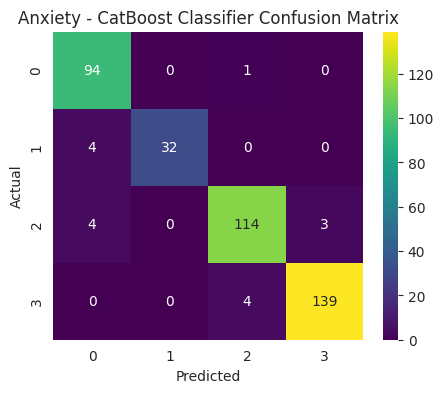

---------------------------------------------------------------------- 

Anxiety - Gaussian Naive Bayes
  Training Accuracy: 85.29%
  Testing Accuracy : 85.32%
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        95
           1       0.96      0.75      0.84        36
           2       0.78      0.83      0.80       121
           3       0.92      0.89      0.90       143

    accuracy                           0.85       395
   macro avg       0.87      0.83      0.85       395
weighted avg       0.86      0.85      0.85       395



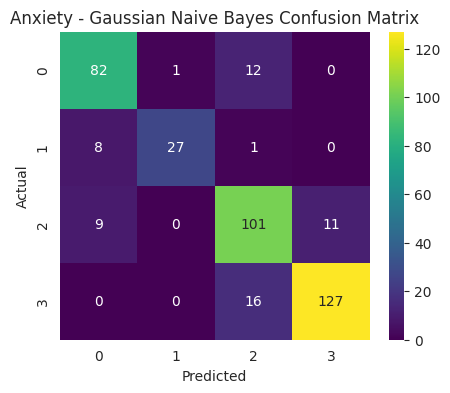

---------------------------------------------------------------------- 

Anxiety - Bernoulli Naive Bayes
  Training Accuracy: 71.85%
  Testing Accuracy : 69.62%
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        95
           1       0.47      0.67      0.55        36
           2       0.66      0.67      0.66       121
           3       0.81      0.80      0.81       143

    accuracy                           0.70       395
   macro avg       0.66      0.68      0.66       395
weighted avg       0.71      0.70      0.70       395



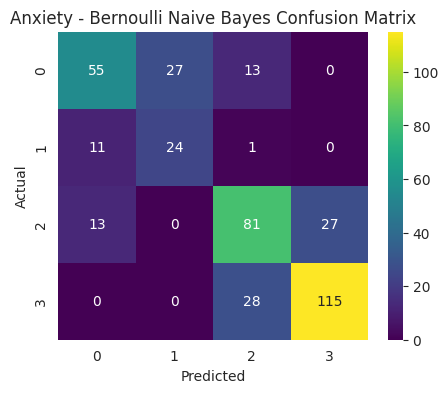

---------------------------------------------------------------------- 


===== Stress Classification =====

Stress - K-Neighbors Classifier
  Training Accuracy: 95.91%
  Testing Accuracy : 84.30%
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       103
           1       0.50      0.86      0.63        21
           2       0.95      0.81      0.88       271

    accuracy                           0.84       395
   macro avg       0.73      0.86      0.78       395
weighted avg       0.87      0.84      0.85       395



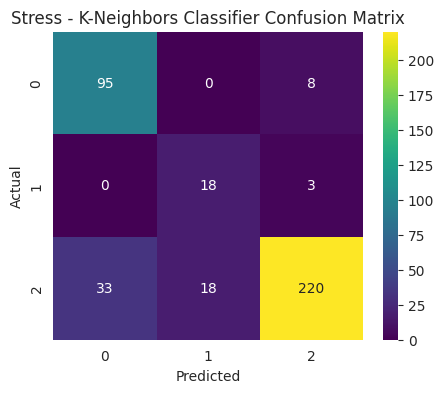

---------------------------------------------------------------------- 

Stress - Support Vector Classifier
  Training Accuracy: 99.74%
  Testing Accuracy : 95.44%
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       103
           1       0.91      0.95      0.93        21
           2       0.97      0.97      0.97       271

    accuracy                           0.95       395
   macro avg       0.94      0.95      0.94       395
weighted avg       0.95      0.95      0.95       395



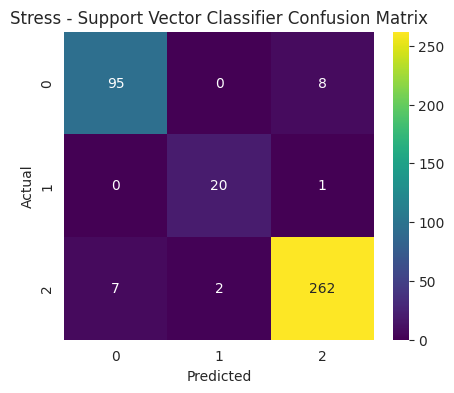

---------------------------------------------------------------------- 

Stress - Decision Tree Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 84.05%
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       103
           1       0.61      0.67      0.64        21
           2       0.89      0.87      0.88       271

    accuracy                           0.84       395
   macro avg       0.75      0.78      0.77       395
weighted avg       0.84      0.84      0.84       395



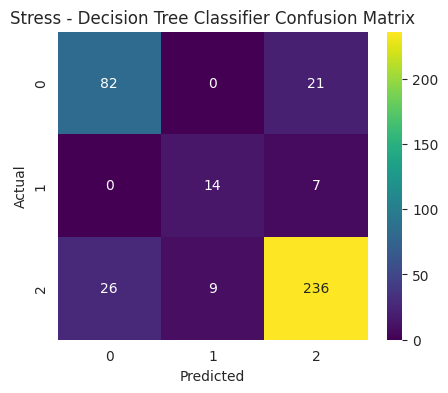

---------------------------------------------------------------------- 

Stress - Random Forest Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 92.66%
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       103
           1       0.94      0.76      0.84        21
           2       0.93      0.96      0.95       271

    accuracy                           0.93       395
   macro avg       0.93      0.86      0.89       395
weighted avg       0.93      0.93      0.93       395



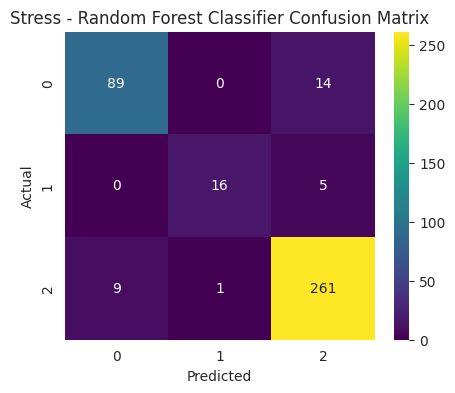

---------------------------------------------------------------------- 

Stress - Gradient Boosting Classifier
  Training Accuracy: 99.94%
  Testing Accuracy : 94.68%
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       103
           1       0.89      0.81      0.85        21
           2       0.95      0.97      0.96       271

    accuracy                           0.95       395
   macro avg       0.93      0.90      0.91       395
weighted avg       0.95      0.95      0.95       395



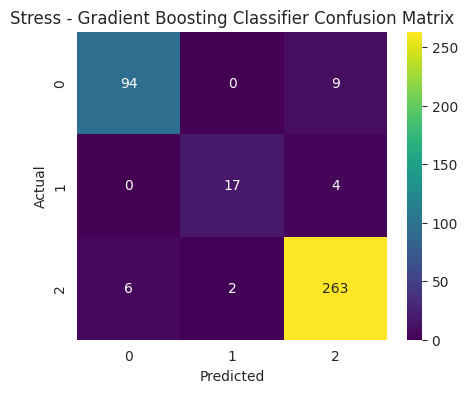

---------------------------------------------------------------------- 

Stress - XGBoost Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 94.43%
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       103
           1       0.86      0.86      0.86        21
           2       0.96      0.96      0.96       271

    accuracy                           0.94       395
   macro avg       0.91      0.91      0.91       395
weighted avg       0.94      0.94      0.94       395



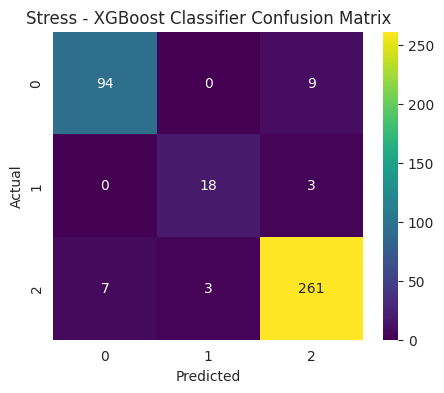

---------------------------------------------------------------------- 

Stress - AdaBoost Classifier
  Training Accuracy: 93.60%
  Testing Accuracy : 88.35%
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       103
           1       0.80      0.57      0.67        21
           2       0.88      0.96      0.92       271

    accuracy                           0.88       395
   macro avg       0.86      0.76      0.80       395
weighted avg       0.88      0.88      0.88       395



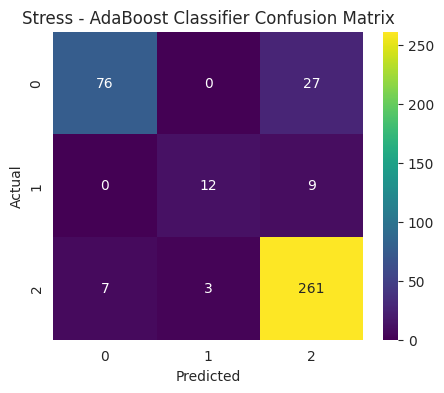

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8072
[LightGBM] [Info] Number of data points in the train set: 3126, number of used features: 33
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Stress - LightGBM Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 93.67%
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       103
           1       0.85      0.81      0.83        21
           2       0.95      0.96      0.95       271

    accuracy                           0.94       395
   macro avg       0.91      0.89      0.90       395
weighted avg       0.94      0.94      0.94       395



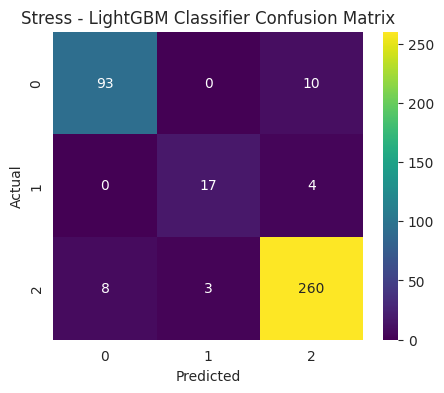

---------------------------------------------------------------------- 

Stress - CatBoost Classifier
  Training Accuracy: 100.00%
  Testing Accuracy : 96.20%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       103
           1       0.91      0.95      0.93        21
           2       0.97      0.97      0.97       271

    accuracy                           0.96       395
   macro avg       0.94      0.95      0.95       395
weighted avg       0.96      0.96      0.96       395



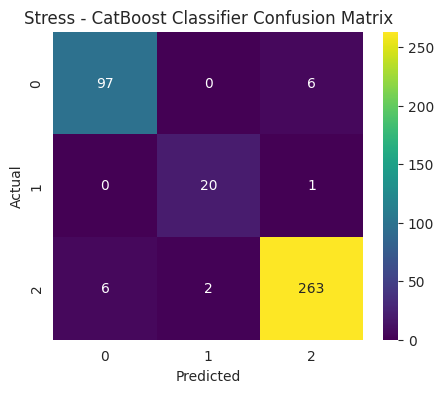

---------------------------------------------------------------------- 

Stress - Gaussian Naive Bayes
  Training Accuracy: 86.08%
  Testing Accuracy : 75.44%
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       103
           1       0.29      0.90      0.44        21
           2       0.91      0.72      0.80       271

    accuracy                           0.75       395
   macro avg       0.64      0.82      0.67       395
weighted avg       0.83      0.75      0.77       395



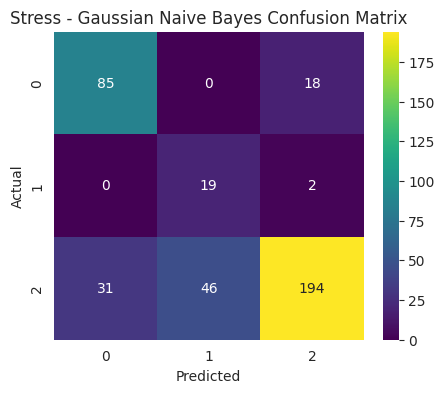

---------------------------------------------------------------------- 

Stress - Bernoulli Naive Bayes
  Training Accuracy: 81.67%
  Testing Accuracy : 66.84%
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       103
           1       0.20      0.86      0.32        21
           2       0.90      0.58      0.71       271

    accuracy                           0.67       395
   macro avg       0.59      0.76      0.60       395
weighted avg       0.80      0.67      0.70       395



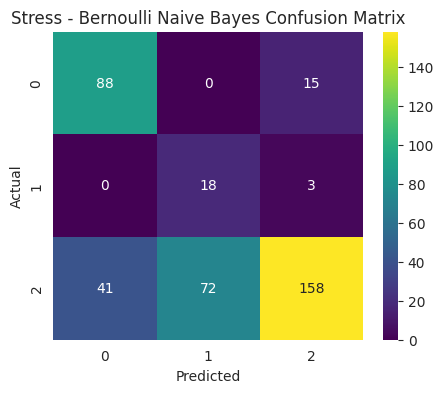

---------------------------------------------------------------------- 



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB


# Define models
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "LightGBM Classifier": LGBMClassifier(random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=0, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB()
}

conditions = ["Depression", "Anxiety", "Stress"]
results = []


for condition in conditions:
    if condition == "Depression":
        X_train_cond, Y_train, Y_test_cond = X_train_res_Dep, y_train_res_Dep, y_test_Depression
    elif condition == "Anxiety":
        X_train_cond, Y_train, Y_test_cond = X_train_res_Anx, y_train_res_Anx, y_test_Anxiety
    elif condition == "Stress":
        X_train_cond, Y_train, Y_test_cond = X_train_res_Str, y_train_res_Str, y_test_Stress

    print(f"\n===== {condition} Classification =====\n")

    for name, model in models.items():
        model.fit(X_train_cond, Y_train)
        Y_pred = model.predict(X_test_imputed) # Use the imputed test data

        train_acc = model.score(X_train_cond, Y_train) * 100
        test_acc = accuracy_score(Y_test_cond, Y_pred) * 100
        cm = confusion_matrix(Y_test_cond, Y_pred)

        results.append({"Condition": condition, "Model": name, "Accuracy": round(test_acc, 4)})

        print(f"{condition} - {name}")
        print(f"  Training Accuracy: {train_acc:.2f}%")
        print(f"  Testing Accuracy : {test_acc:.2f}%")
        print(classification_report(Y_test_cond, Y_pred))

        # Confusion matrix plot
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{condition} - {name} Confusion Matrix")
        plt.show()
        print("-"*70, "\n")

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare list to store results
results_table = []

for condition in conditions:
    if condition == "Depression":
        X_train, Y_train, Y_test_cond = X_train_res_Dep, y_train_res_Dep, y_test_Depression
    elif condition == "Anxiety":
        X_train, Y_train, Y_test_cond = X_train_res_Anx, y_train_res_Anx, y_test_Anxiety
    elif condition == "Stress":
        X_train, Y_train, Y_test_cond = X_train_res_Str, y_train_res_Str, y_test_Stress

    for name, model in models.items():
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)  # Use the same X_test for all

        acc = accuracy_score(Y_test_cond, Y_pred)
        prec = precision_score(Y_test_cond, Y_pred, average="weighted", zero_division=0)
        rec = recall_score(Y_test_cond, Y_pred, average="weighted", zero_division=0)
        f1 = f1_score(Y_test_cond, Y_pred, average="weighted", zero_division=0)

        results_table.append({
            "Condition": condition,
            "Model": name,
            "Accuracy": round(acc*100, 2),
            "Precision": round(prec*100, 2),
            "Recall": round(rec*100, 2),
            "F1-Score": round(f1*100, 2)
        })

# Convert to DataFrame
df_results = pd.DataFrame(results_table)

# Display table sorted by Condition and Accuracy
df_results = df_results.sort_values(by=["Condition", "Accuracy"], ascending=[True, False])
print(df_results)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5320
[LightGBM] [Info] Number of data points in the train set: 2388, number of used features: 33
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [ ]:
evaluation_dataset2 = pd.DataFrame(results)
evaluation_dataset2

,Condition,Model,Accuracy
0,Depression,K-Neighbors Classifier,67.3418
1,Depression,Support Vector Classifier,87.8481
2,Depression,Decision Tree Classifier,72.6582
3,Depression,Random Forest Classifier,84.3038
4,Depression,Gradient Boosting Classifier,88.1013
5,Depression,XGBoost Classifier,85.8228
6,Depression,AdaBoost Classifier,45.8228
7,Depression,LightGBM Classifier,89.3671
8,Depression,CatBoost Classifier,93.9241
9,Depression,Gaussian Naive Bayes,69.8734


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5320
[LightGBM] [Info] Number of data points in the train set: 2388, number of used features: 33
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

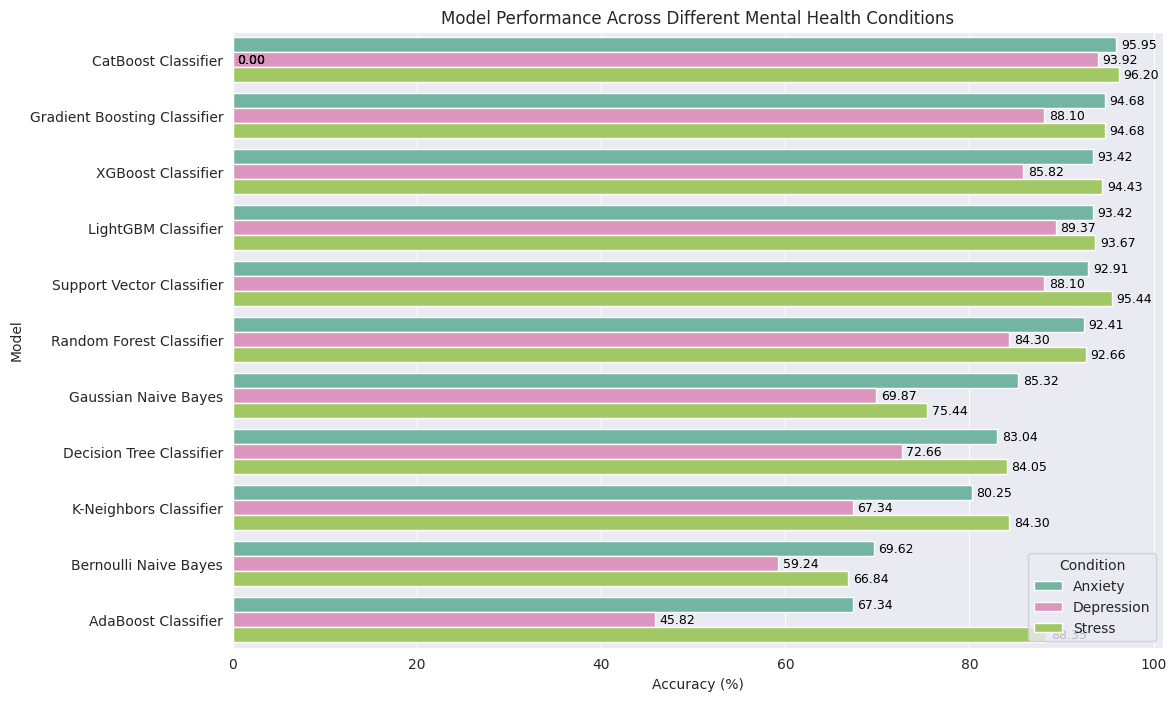

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# ---------------------------
# Step 1: Handle missing values
# ---------------------------
# Replace -1 with NaN
X_test_df = pd.DataFrame(X_test).replace(-1, np.nan)

# Fit imputer on original training set (before oversampling for consistency)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)   # <-- instead of X_train_res_Dep
X_test_imputed = imputer.transform(X_test_df)

# ---------------------------
# Step 2: Train & Evaluate Models
# ---------------------------
results_table = []

for condition in conditions:
    if condition == "Depression":
        X_train_cond, Y_train, Y_test_cond = X_train_res_Dep, y_train_res_Dep, y_test_Depression
    elif condition == "Anxiety":
        X_train_cond, Y_train, Y_test_cond = X_train_res_Anx, y_train_res_Anx, y_test_Anxiety
    elif condition == "Stress":
        X_train_cond, Y_train, Y_test_cond = X_train_res_Str, y_train_res_Str, y_test_Stress

    for name, model in models.items():
        model.fit(X_train_cond, Y_train)
        Y_pred = model.predict(X_test_imputed)

        acc = accuracy_score(Y_test_cond, Y_pred)
        prec = precision_score(Y_test_cond, Y_pred, average="weighted", zero_division=0)
        rec = recall_score(Y_test_cond, Y_pred, average="weighted", zero_division=0)
        f1 = f1_score(Y_test_cond, Y_pred, average="weighted", zero_division=0)

        results_table.append({
            "Condition": condition,
            "Model": name,
            "Accuracy": round(acc*100, 2),
            "Precision": round(prec*100, 2),
            "Recall": round(rec*100, 2),
            "F1-Score": round(f1*100, 2)
        })

# Convert results to DataFrame
df_results = pd.DataFrame(results_table)
df_results = df_results.sort_values(by=["Condition", "Accuracy"], ascending=[True, False])
print(df_results)

# ---------------------------
# Step 3: Plot results
# ---------------------------
color = ['#66c2a5', '#e78ac3', '#a6d854', '#ffd92f']

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=df_results, x="Accuracy", y="Model", hue="Condition", orient="h", palette=color)

# Add labels on bars
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.text(width + 0.5, p.get_y() + p.get_height() / 2,
                  f'{width:.2f}', ha='left', va='center', fontsize=9, color='black')

plt.title("Model Performance Across Different Mental Health Conditions")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.legend(title="Condition")
plt.show()


In [ ]:
from catboost import CatBoostClassifier

model_anxiety = CatBoostClassifier(random_state=42)
model_anxiety.fit(X_train_res_Anx, y_train_res_Anx)

model_stress = CatBoostClassifier(random_state=42)
model_stress.fit(X_train_res_Str,y_train_res_Str)

model_depression = CatBoostClassifier(random_state=42)
model_depression.fit(X_train_res_Dep,y_train_res_Dep)

Learning rate set to 0.082531
0:	learn: 1.2445604	total: 54.6ms	remaining: 54.5s
1:	learn: 1.1467576	total: 104ms	remaining: 52s
2:	learn: 1.0553565	total: 152ms	remaining: 50.4s
3:	learn: 0.9707435	total: 196ms	remaining: 48.7s
4:	learn: 0.9020344	total: 246ms	remaining: 49s
5:	learn: 0.8443431	total: 297ms	remaining: 49.2s
6:	learn: 0.7903063	total: 345ms	remaining: 49s
7:	learn: 0.7428884	total: 398ms	remaining: 49.3s
8:	learn: 0.6972828	total: 438ms	remaining: 48.2s
9:	learn: 0.6594562	total: 490ms	remaining: 48.5s
10:	learn: 0.6226055	total: 530ms	remaining: 47.7s
11:	learn: 0.5907749	total: 578ms	remaining: 47.6s
12:	learn: 0.5591085	total: 625ms	remaining: 47.4s
13:	learn: 0.5335268	total: 670ms	remaining: 47.2s
14:	learn: 0.5068722	total: 719ms	remaining: 47.2s
15:	learn: 0.4846817	total: 774ms	remaining: 47.6s
16:	learn: 0.4623048	total: 827ms	remaining: 47.8s
17:	learn: 0.4418969	total: 877ms	remaining: 47.9s
18:	learn: 0.4220401	total: 924ms	remaining: 47.7s
19:	learn: 0.404

In [ ]:
predictions = predict_all_labels(X_test_imputed) # Use the imputed test data
# Flatten the prediction arrays before creating the DataFrame
pred_df = pd.DataFrame({
    "Anxiety Label": predictions["Anxiety Label"].ravel(),
    "Stress Label": predictions["Stress Label"].ravel(),
    "Depression Label": predictions["Depression Label"].ravel()
})
y_test = pd.DataFrame({
    "Anxiety Label": y_test_Anxiety,
    "Stress Label": y_test_Stress,
    "Depression Label": y_test_Depression
})

In [ ]:
def predict_all_labels(X_test):
    pred_anxiety = model_anxiety.predict(X_test)
    pred_stress = model_stress.predict(X_test)
    pred_depression = model_depression.predict(X_test)

    predictions = {
        "Anxiety Label": pred_anxiety,
        "Stress Label": pred_stress,
        "Depression Label": pred_depression
    }

    return predictions

In [ ]:
for label in ["Anxiety Label", "Stress Label", "Depression Label"]:
    print(f"Classification Report for {label}:")
    print(classification_report(y_test[label], pred_df[label]))

Classification Report for Anxiety Label:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        95
           1       1.00      0.89      0.94        36
           2       0.96      0.94      0.95       121
           3       0.98      0.97      0.98       143

    accuracy                           0.96       395
   macro avg       0.96      0.95      0.96       395
weighted avg       0.96      0.96      0.96       395

Classification Report for Stress Label:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       103
           1       0.91      0.95      0.93        21
           2       0.97      0.97      0.97       271

    accuracy                           0.96       395
   macro avg       0.94      0.95      0.95       395
weighted avg       0.96      0.96      0.96       395

Classification Report for Depression Label:
              precision    recall  f1-score   support

    

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', LGBMClassifier(random_state=42))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
models["Stacking Classifier"] = stacking_model


In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{condition} - {name} Confusion Matrix")
plt.show()


NameError: name 'Y_test' is not defined

<Figure size 500x400 with 0 Axes>

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
X_train_res_Dep_df = pd.DataFrame(X_train_res_Dep)
print(X_train_res_Dep_df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
dtype: int64


In [ ]:
# Group 1: Tree-based + boosting
group1_models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Group 2: Boosting + ensemble
group2_models = [
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42))
]

# Group 3: Classic + tree
group3_models = [
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVC', SVC(probability=True, random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42))
]

In [ ]:
voting_classifiers = {
    "Group1_HardVoting": VotingClassifier(estimators=group1_models, voting='hard'),
    "Group2_SoftVoting": VotingClassifier(estimators=group2_models, voting='soft'),
    #"Group3_SoftVoting": VotingClassifier(estimators=group3_models, voting='soft')
}

===== Depression =====

Group1_HardVoting Accuracy: 85.97%
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        79
           1       0.91      0.77      0.83        13
           2       0.80      0.82      0.81        91
           3       0.82      0.86      0.84        92
           4       1.00      1.00      1.00         9
           5       0.95      0.90      0.92       108

    accuracy                           0.86       392
   macro avg       0.89      0.87      0.88       392
weighted avg       0.86      0.86      0.86       392



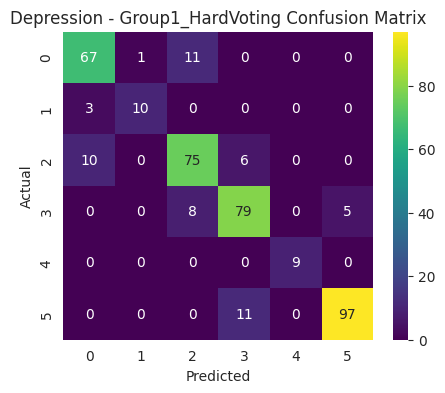

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5671
[LightGBM] [Info] Number of data points in the train set: 2406, number of used features: 33
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

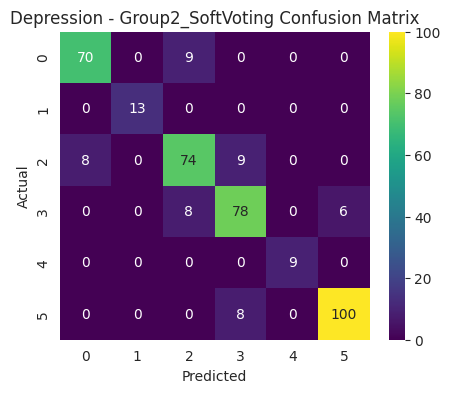

---------------------------------------------------------------------- 

===== Anxiety =====

Group1_HardVoting Accuracy: 93.37%
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.89      0.73      0.80        22
           2       0.92      0.93      0.93       119
           3       0.97      0.97      0.97       152

    accuracy                           0.93       392
   macro avg       0.92      0.89      0.90       392
weighted avg       0.93      0.93      0.93       392



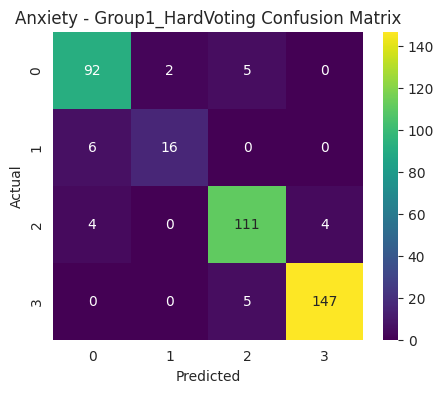

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5707
[LightGBM] [Info] Number of data points in the train set: 2236, number of used features: 33
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Group2_SoftVoting Accuracy: 93.11%
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.86      0.82      0.84        22
           

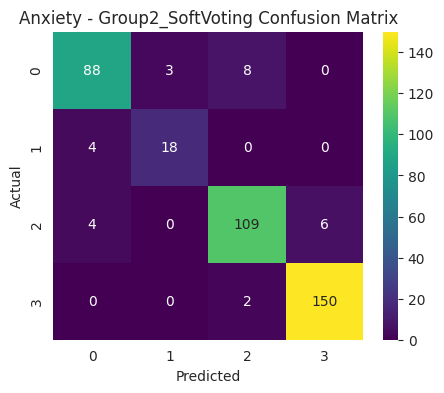

---------------------------------------------------------------------- 

===== Stress =====

Group1_HardVoting Accuracy: 92.60%
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       113
           1       0.95      0.69      0.80        26
           2       0.92      0.97      0.94       253

    accuracy                           0.93       392
   macro avg       0.94      0.85      0.88       392
weighted avg       0.93      0.93      0.92       392



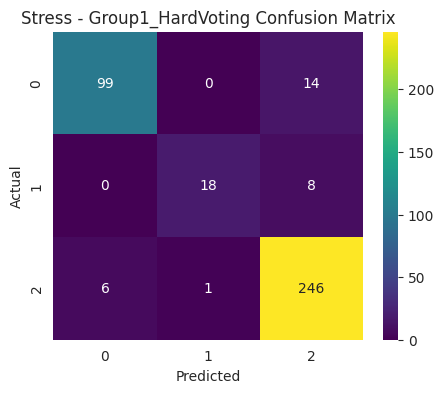

---------------------------------------------------------------------- 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8080
[LightGBM] [Info] Number of data points in the train set: 3156, number of used features: 33
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Group2_SoftVoting Accuracy: 93.11%
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       113
           1       0.96      0.85      0.90        26
           2       0.93      0.96      0.95       253

    accuracy                           0.93       392
   macro avg       0.94      0.90      0.92       392
weighted avg       0.93      0.93      0.93       392



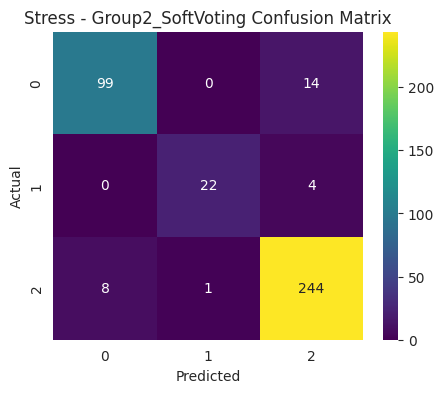

---------------------------------------------------------------------- 



In [ ]:
conditions = ["Depression", "Anxiety", "Stress"]

for condition in conditions:
    if condition == "Depression":
        X_train_cond, X_test_cond = X_train_res_Dep, X_test
        y_train_cond, y_test_cond = y_train_res_Dep, y_test_Depression
    elif condition == "Anxiety":
        X_train_cond, X_test_cond = X_train_res_Anx, X_test
        y_train_cond, y_test_cond = y_train_res_Anx, y_test_Anxiety
    elif condition == "Stress":
        X_train_cond, X_test_cond = X_train_res_Str, X_test
        y_train_cond, y_test_cond = y_train_res_Str, y_test_Stress

    print(f"===== {condition} =====\n")
    for name, model in voting_classifiers.items():
        model.fit(X_train_cond, y_train_cond)
        y_pred = model.predict(X_test_cond)
        acc = accuracy_score(y_test_cond, y_pred) * 100
        print(f"{name} Accuracy: {acc:.2f}%")
        print(classification_report(y_test_cond, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test_cond, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                    xticklabels=np.unique(y_test_cond),
                    yticklabels=np.unique(y_test_cond))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{condition} - {name} Confusion Matrix")
        plt.show()
        print("-"*70, "\n")

# **XAI**

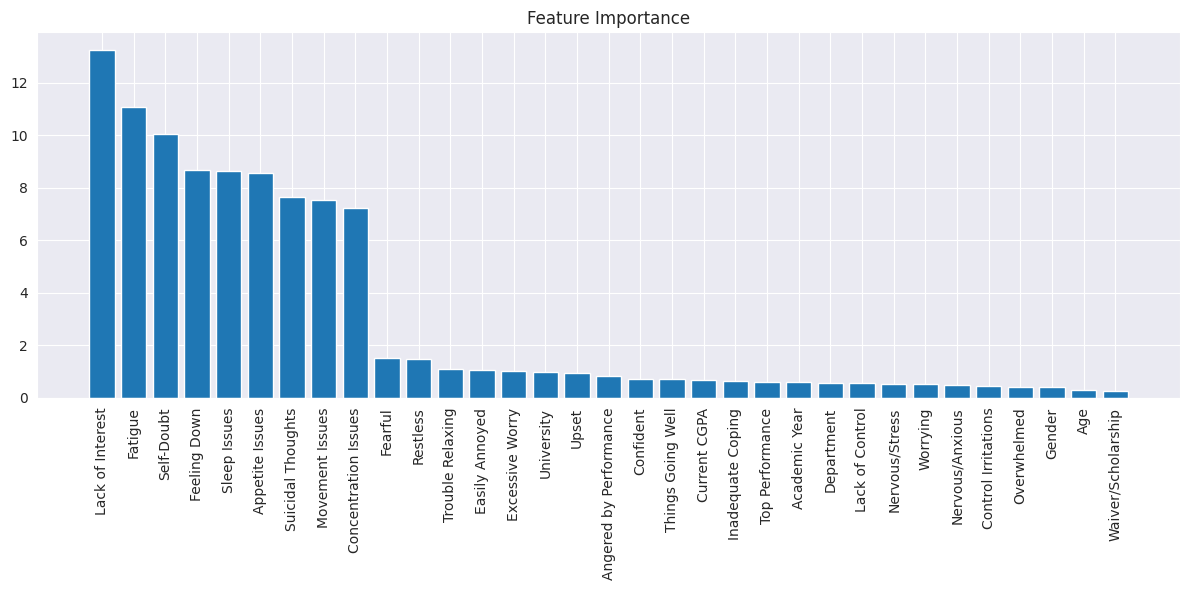

In [ ]:
import numpy as np
importances = model_depression.feature_importances_
# Assuming the original column names before scaling are available in dataset2.columns
# We need to exclude the target columns as they were dropped before scaling
original_columns = dataset2.drop(columns=["Anxiety Label","Anxiety Value", "Stress Label", "Stress Value",  "Depression Value", "Depression Label"]).columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), original_columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
print(importances[sorted_indices])

[13.26299357 11.07020282 10.03656803  8.68697236  8.64580161  8.58244898
  7.66757189  7.51899244  7.24061615  1.50032202  1.45961386  1.08391917
  1.0567499   1.01366328  0.97906812  0.96249503  0.82928693  0.70808383
  0.70208828  0.68986646  0.62211444  0.58803574  0.58688324  0.56623349
  0.55293145  0.53397385  0.53317456  0.46801485  0.46458521  0.4154931
  0.40118507  0.30814141  0.26190889]


Feature selection and dimensionility reduction

In [ ]:
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Prepare the data for modeling
def prepare_data_for_modeling(dataset, target_column):
    """
    Prepare data for machine learning modeling
    """
    # Separate features and target
    X = dataset.drop(columns=[target_column, 'Anxiety Label', 'Stress Label', 'Depression Label',
                             'Anxiety Value', 'Stress Value', 'Depression Value'])
    y = dataset[target_column]

    # Identify categorical columns
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64']).columns.tolist()

    # Encode categorical variables
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

    # Encode target variable if it's categorical
    if y.dtype == 'object':
        le_target = LabelEncoder()
        y = le_target.fit_transform(y)
    else:
        le_target = None

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y)) > 2 else None
    )

    # Scale numerical features
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train, X_test, y_train, y_test, categorical_cols, numerical_cols, label_encoders, le_target

# Train a model for each mental health condition
def train_models(dataset):
    """
    Train models for anxiety, stress, and depression classification
    """
    models = {}
    results = {}

    # For each mental health condition
    for condition in ['Anxiety Label', 'Stress Label', 'Depression Label']:
        print(f"Training model for: {condition}")

        # Prepare data
        X_train, X_test, y_train, y_test, categorical_cols, numerical_cols, label_encoders, le_target = prepare_data_for_modeling(dataset, condition)

        # Train Random Forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        model.fit(X_train, y_train)

        # Store results
        models[condition] = {
            'model': model,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'categorical_cols': categorical_cols,
            'numerical_cols': numerical_cols,
            'label_encoders': label_encoders,
            'le_target': le_target,
            'feature_names': X_train.columns.tolist()
        }

        # Calculate accuracy
        accuracy = model.score(X_test, y_test)
        results[condition] = accuracy
        print(f"Accuracy for {condition}: {accuracy:.4f}")

    return models, results

# Initialize LIME explainer
def create_lime_explainer(X_train, feature_names, categorical_cols, numerical_cols):
    """
    Create LIME explainer for tabular data
    """
    # Create LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=['Low', 'Moderate', 'High', 'Severe'],  # Adjust based on your labels
        categorical_features=[feature_names.index(col) for col in categorical_cols],
        categorical_names={feature_names.index(col): list(label_encoders[col].classes_)
                          for col in categorical_cols if col in label_encoders},
        verbose=True,
        mode='classification',
        random_state=42
    )
    return explainer

# Generate LIME explanations
def generate_lime_explanations(models, num_explanations=5):
    """
    Generate LIME explanations for each model
    """
    explanations = {}

    for condition, model_data in models.items():
        print(f"\nGenerating LIME explanations for: {condition}")

        # Create explainer
        explainer = create_lime_explainer(
            model_data['X_train'],
            model_data['feature_names'],
            model_data['categorical_cols'],
            model_data['numerical_cols']
        )

        # Select random instances to explain
        np.random.seed(42)
        sample_indices = np.random.choice(len(model_data['X_test']),
                                        size=min(num_explanations, len(model_data['X_test'])),
                                        replace=False)

        condition_explanations = []

        for i, idx in enumerate(sample_indices):
            instance = model_data['X_test'].iloc[idx]
            true_label = model_data['y_test'].iloc[idx]

            # Get prediction
            pred = model_data['model'].predict_proba(instance.values.reshape(1, -1))[0]
            pred_class = np.argmax(pred)

            # Generate explanation
            exp = explainer.explain_instance(
                instance.values,
                model_data['model'].predict_proba,
                num_features=10,
                top_labels=3
            )

            # Store explanation
            explanation_data = {
                'instance_index': idx,
                'true_label': true_label,
                'predicted_class': pred_class,
                'prediction_probabilities': pred,
                'explanation': exp,
                'instance_values': instance
            }

            condition_explanations.append(explanation_data)

            print(f"Instance {i+1}: True={true_label}, Predicted={pred_class}")

        explanations[condition] = condition_explanations

    return explanations

# Visualize LIME explanations
def visualize_lime_explanations(explanations, models):
    """
    Visualize LIME explanations with plots
    """
    for condition, condition_explanations in explanations.items():
        print(f"\n{'='*60}")
        print(f"LIME EXPLANATIONS FOR: {condition}")
        print(f"{'='*60}")

        model_data = models[condition]

        for i, exp_data in enumerate(condition_explanations):
            print(f"\nExplanation {i+1}:")
            print(f"True label: {exp_data['true_label']}")
            print(f"Predicted class: {exp_data['predicted_class']}")
            print(f"Prediction probabilities: {exp_data['prediction_probabilities']}")

            # Show explanation in text
            print("\nLIME Explanation:")
            exp_data['explanation'].show_in_notebook(show_table=True)

            # You can also save the explanations as HTML or images
            # exp_data['explanation'].save_to_file(f'lime_explanation_{condition}_{i}.html')

# Analyze feature importance across explanations
def analyze_feature_importance(explanations, models):
    """
    Analyze which features are most important across all explanations
    """
    feature_importance = {}

    for condition, condition_explanations in explanations.items():
        print(f"\nFeature Importance Analysis for: {condition}")
        print("-" * 50)

        feature_scores = {}

        for exp_data in condition_explanations:
            # Get feature weights from LIME explanation
            exp_list = exp_data['explanation'].as_list()

            for feature, weight in exp_list:
                feature_name = feature.split('=')[0].strip() if '=' in feature else feature

                if feature_name not in feature_scores:
                    feature_scores[feature_name] = []

                feature_scores[feature_name].append(abs(weight))  # Use absolute value for importance

        # Calculate average importance for each feature
        avg_importance = {}
        for feature, scores in feature_scores.items():
            avg_importance[feature] = np.mean(scores)

        # Sort by importance
        sorted_importance = sorted(avg_importance.items(), key=lambda x: x[1], reverse=True)

        print("Top 10 most important features:")
        for feature, importance in sorted_importance[:10]:
            print(f"{feature}: {importance:.4f}")

        feature_importance[condition] = sorted_importance

    return feature_importance

# Main execution
def main():
    # Train models for all three conditions
    print("Training models for anxiety, stress, and depression...")
    models, results = train_models(dataset2)

    # Generate LIME explanations
    print("\nGenerating LIME explanations...")
    explanations = generate_lime_explanations(models, num_explanations=3)

    # Visualize explanations
    print("\nVisualizing LIME explanations...")
    visualize_lime_explanations(explanations, models)

    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    feature_importance = analyze_feature_importance(explanations, models)

    return models, explanations, feature_importance

# Run the main function
if __name__ == "__main__":
    models, explanations, feature_importance = main()

Training models for anxiety, stress, and depression...
Training model for: Anxiety Label
Accuracy for Anxiety Label: 0.9418
Training model for: Stress Label
Accuracy for Stress Label: 0.9139
Training model for: Depression Label
Accuracy for Depression Label: 0.8430

Generating LIME explanations...

Generating LIME explanations for: Anxiety Label


ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.